# Table of Contents

1. [Data Pre-Processing](#1-data-pre-processing)<br>
    1.1 [Read File](#11-read-file)<br>
    1.2 [Load Libraries](#12-load-libraries)<br>
    1.3 [Data Cleaning](#13-data-cleaning)<br>
2. [Fit Full Models](#2-fit-full-models)<br>
3. [Testing for Multicollinearity](#3-testing-for-multicollinearity)<br>
4. [Exploratory Analysis](#4-exploratory-analysis)<br>
    4.1 [Histograms](#41-histograms)<br>
    4.2 [Correlation Matrix](#42-correlation-matrix)<br>
    4.3 [Scatter Plots](#43-scatter-plots)<br>
    4.4 [Added-Variable Plots](#44-added-variable-plots)<br>
5. [Exploratory Analysis](#4-exploratory-analysis)<br>
    5.1 [1st Model (y1)](#51-1st-model-y1)<br>
        5.1.1 [Residual Analysis](#511-residual-analysis)<br>
        5.1.2 [Conclusions](#512-conclusions)<br>
    5.2 [2nd Model (y2)](#52-2nd-model-y2)<br>
        5.2.1 [Residual Analysis](#521-residual-analysis)<br>
        5.2.2 [Conclusions](#522-conclusions)<br>
    5.3 [Conclusions](#53-conclusions)<br>
6. [Residual Analysis](#6-residual-analysis)<br>
    6.1 [Before Removing Outliers](#61-before-removing-outliers)<br>
    6.2 [After Removing Outliers](#62-after-removing-outliers)<br>
7. [Influential Analysis](#7-influential-analysis)<br>
    7.1 [Influential Analysis](#71-influential-analysis)<br>
    7.2 [Leverage Analysis](#72-leverage-analysis)<br>
    7.3 [Normal Probability Plot of Residuals](#73-normal-probability-plot-of-residuals)<br>
    7.4 [PLots of Residuals vs Fitted Values](#74-plots-of-residuals-vs-fitted-values)<br>
8. [Transformations](#8-transformations)<br>
    8.1 [Box-Cox Transformation](#81-box-cox-transformation)<br>
    8.2 [Yeo-Johnson](#82-yeo-johnson-transformation)<br>
9. [Overall Conclusions](#9-overall-conclusions)

# 1. Data Pre-Processing

## 1.1. Read File

The CSV file from the API instances will be used for the analysis because it contains the most observations and variables among the four files. There are 3973 observations and 43 variables.

In [1]:
api_csv <- read.csv("lovoo_v3_users_api-results.csv")

## 1.2. Load Libraries

In [2]:
library(car)
library(corrplot)
library(dplyr)
library(ggplot2)
library(ggpubr)
library(MASS)
library(reshape2)
library(stringr)
library(tidyr)

Loading required package: carData

corrplot 0.92 loaded


Attaching package: 'dplyr'


The following object is masked from 'package:car':

    recode


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select



Attaching package: 'tidyr'


The following object is masked from 'package:reshape2':

    smiths




## 1.3. Data Cleaning <a class = "anchor" id = "1.3. Data Cleaning"></a>

After identifying the 29 variables that are common to the four files, I then dropped 9 more variables because they were not relevant to the analysis.

The remaining 20 variables are:
1. counts_kisses (Integer): Number of kisses the user has received
2. counts_profileVisits (Integer): Number of times the user’s profile has been visited
age (Integer): Age of the user
3. city (String): City of the user
4. counts_pictures (Integer): Number of pictures the user has uploaded
5. flirtInterests_chat (Boolean): Whether the user is interested in chatting
6. flirtInterests_date (Boolean): Whether the user is interested in dating
7. flirtInterests_friends (Boolean): Whether the user is interested in making friends
8. isFlirtstar (Boolean): Whether the user is a flirtstar
9. isHighlighted (Boolean): Whether the user is highlighted
10. isVIP (Boolean): Whether the user is a VIP
11. lang_count (Integer): Number of languages the user speaks
12. lang_de (Boolean): Whether the user speaks German
13. lang_en (Boolean): Whether the user speaks English
14. lang_es (Boolean): Whether the user speaks Spanish
15. lang_fr (Boolean): Whether the user speaks French
16. lang_it (Boolean): Whether the user speaks Italian
17. lang_pt (Boolean): Whether the user speaks Portuguese
18. isMobile (Boolean): Whether the user is using a mobile device
19. isVerified / isVerified (Boolean): Whether the user is verified
20. whazzup (String): What’s up field of the user’s profile

In [3]:
colnames(api_csv)[25] <- "isVIP"
colnames(api_csv)[33] <- "isVerified"

dataframe <- api_csv %>%
  dplyr::select(counts_kisses, counts_profileVisits,
                age, counts_pictures, flirtInterests_chat, flirtInterests_date, 
                flirtInterests_friends, isFlirtstar, isHighlighted, lang_count,
                lang_de, lang_en, lang_es, lang_fr, lang_it, lang_pt, isMobile, 
                isVIP, isVerified, whazzup)

### 1.3.1. Indicator Variables <a class = "anchor" id = "1.3.1. Indicator Variables"></a>

\begin{equation*}
 x =
   \left\{\begin{array}{lr}
       1, & if&true \\
       0, & if&false 
    \end{array}\right.
 \end{equation*}

 Any variables that contained boolean values were converted into indicator variables, with 1 representing true and 0 representing false.

In [4]:
dataframe$flirtInterests_chat <- as.integer(as.logical(dataframe$flirtInterests_chat))

dataframe$flirtInterests_date <- as.integer(as.logical(dataframe$flirtInterests_date))

dataframe$flirtInterests_friends <- as.integer(as.logical(dataframe$flirtInterests_friends))

dataframe$isFlirtstar <- as.integer(as.logical(dataframe$isFlirtstar))

dataframe$isHighlighted <- as.integer(as.logical(dataframe$isHighlighted))

dataframe$lang_de <- as.integer(as.logical(dataframe$lang_de))

dataframe$lang_en <- as.integer(as.logical(dataframe$lang_en))

dataframe$lang_es <- as.integer(as.logical(dataframe$lang_es))

dataframe$lang_fr <- as.integer(as.logical(dataframe$lang_fr))

dataframe$lang_it <- as.integer(as.logical(dataframe$lang_it))

dataframe$lang_pt <- as.integer(as.logical(dataframe$lang_pt))

dataframe$isMobile <- as.integer(as.logical(dataframe$isMobile))

dataframe$isVIP <- as.integer(as.logical(dataframe$isVIP))

dataframe$isVerified <- as.integer(as.logical(dataframe$isVerified))

In [5]:
# Find length of whazzup
dataframe$whazzup <- str_length(dataframe$whazzup)

In [6]:
y1 <- dataframe[, 1]
y2 <- dataframe[, 2]

x1 <- dataframe[, 3]
x2 <- dataframe[, 4]
x3 <- dataframe[, 5]
x4 <- dataframe[, 6]
x5 <- dataframe[, 7]
x6 <- dataframe[, 8]
x7 <- dataframe[, 9]
x8 <- dataframe[, 10]
x9 <- dataframe[, 11]
x10 <- dataframe[, 12]
x11 <- dataframe[, 13]
x12 <- dataframe[, 14]
x13 <- dataframe[, 15]
x14 <- dataframe[, 16]
x15 <- dataframe[, 17]
x16 <- dataframe[, 18]
x17 <- dataframe[, 19]
x18 <- dataframe[, 20]

I took counts_kisses and counts_profileVisits as the 2 response variables to quantify the popularity of a user's profile. The remaining 18 variables were taken as the predictor variabels to gauge the number of kisses and profile visits a user's profile could receive. Since there's 2 response variables, I'll be building 2 multiple linear regression models.

**Response Variables:**<br>
y<sub>1</sub>: counts_kisses<br>
y<sub>2</sub>: counts_profileVisits

**Predictor Variables:**<br>
x<sub>1</sub>: age<br>
x<sub>2</sub>: counts_pictures<br>
x<sub>3</sub>: flirtInterests_chat<br>
x<sub>4</sub>: flirtInterests_date<br> 
x<sub>5</sub>: flirtInterests_friends<br> 
x<sub>6</sub>: isFlirtstar<br>
x<sub>7</sub>: isHighlighted<br>
x<sub>8</sub>: lang_count<br>
x<sub>9</sub>: lang_de<br>
x<sub>10</sub>: lang_en<br>
x<sub>11</sub>: lang_es<br>
x<sub>12</sub>: lang_fr<br>
x<sub>13</sub>: lang_it<br> 
x<sub>14</sub>: lang_pt<br> 
x<sub>15</sub>: isMobile<br> 
x<sub>16</sub>: isVip<br>
x<sub>17</sub>: verified<br>
x<sub>18</sub>: whazzup


# 2. Fit Full Models

In [7]:
fit_one <- lm(y1 ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10 
              + x11 + x12 + x13 + x14 + x15 + x16 + x17 + x18,
          data = dataframe)

summary(fit_one)


Call:
lm(formula = y1 ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + 
    x10 + x11 + x12 + x13 + x14 + x15 + x16 + x17 + x18, data = dataframe)

Residuals:
   Min     1Q Median     3Q    Max 
-931.6 -117.6  -45.6   20.3 8598.5 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   21.9306    69.9012   0.314 0.753737    
x1            -4.3638     2.8831  -1.514 0.130209    
x2            28.5409     1.3427  21.256  < 2e-16 ***
x3            33.1039    11.7293   2.822 0.004792 ** 
x4            18.0645    11.8875   1.520 0.128686    
x5           -26.2957    11.8491  -2.219 0.026528 *  
x6           -10.7548    51.4009  -0.209 0.834277    
x7                 NA         NA      NA       NA    
x8           122.0653    27.9013   4.375 1.25e-05 ***
x9           -80.6458    36.3355  -2.219 0.026511 *  
x10          -84.9316    42.7869  -1.985 0.047214 *  
x11         -141.8618    54.8760  -2.585 0.009770 ** 
x12         

In [8]:
fit_two <- lm(y2 ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10 
              + x11 + x12 + x13 + x14 + x15 + x16 + x17 + x18,
              data = dataframe)

summary(fit_two)


Call:
lm(formula = y2 ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + 
    x10 + x11 + x12 + x13 + x14 + x15 + x16 + x17 + x18, data = dataframe)

Residuals:
   Min     1Q Median     3Q    Max 
-18425  -2630  -1010    657 149726 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1861.42    1222.94   1.522 0.128068    
x1           -160.10      50.44  -3.174 0.001514 ** 
x2            564.93      23.49  24.049  < 2e-16 ***
x3            708.84     205.21   3.454 0.000558 ***
x4            364.28     207.97   1.752 0.079930 .  
x5           -355.64     207.30  -1.716 0.086319 .  
x6           -634.69     899.27  -0.706 0.480363    
x7                NA         NA      NA       NA    
x8           1906.35     488.14   3.905 9.57e-05 ***
x9           -344.57     635.70  -0.542 0.587832    
x10         -1030.02     748.57  -1.376 0.168905    
x11         -2062.18     960.07  -2.148 0.031779 *  
x12         -1810.00     

# 3. Testing for Multicollinearity

In [9]:
# vif(fit_one) # aliased coefficients in the model

In [10]:
# vif(fit_two) # aliased coefficients in the model 

There's aliased coefficients in both models that prevent the variance inflation factors (VIFs) from being calculated. Let's find the aliased coefficients and remove them so that I'll be able to calculate the VIFs.

In [11]:
# Find the aliased coefficient
alias(fit_one) # x7

alias(fit_two) # x7

Model :
y1 ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10 + x11 + 
    x12 + x13 + x14 + x15 + x16 + x17 + x18

Complete :
   (Intercept) x1 x2 x3 x4 x5 x6 x8 x9 x10 x11 x12 x13 x14 x15 x16 x17 x18
x7 0           0  0  0  0  0  1  0  0  0   0   0   0   0   0   0   0   0  


Model :
y2 ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10 + x11 + 
    x12 + x13 + x14 + x15 + x16 + x17 + x18

Complete :
   (Intercept) x1 x2 x3 x4 x5 x6 x8 x9 x10 x11 x12 x13 x14 x15 x16 x17 x18
x7 0           0  0  0  0  0  1  0  0  0   0   0   0   0   0   0   0   0  


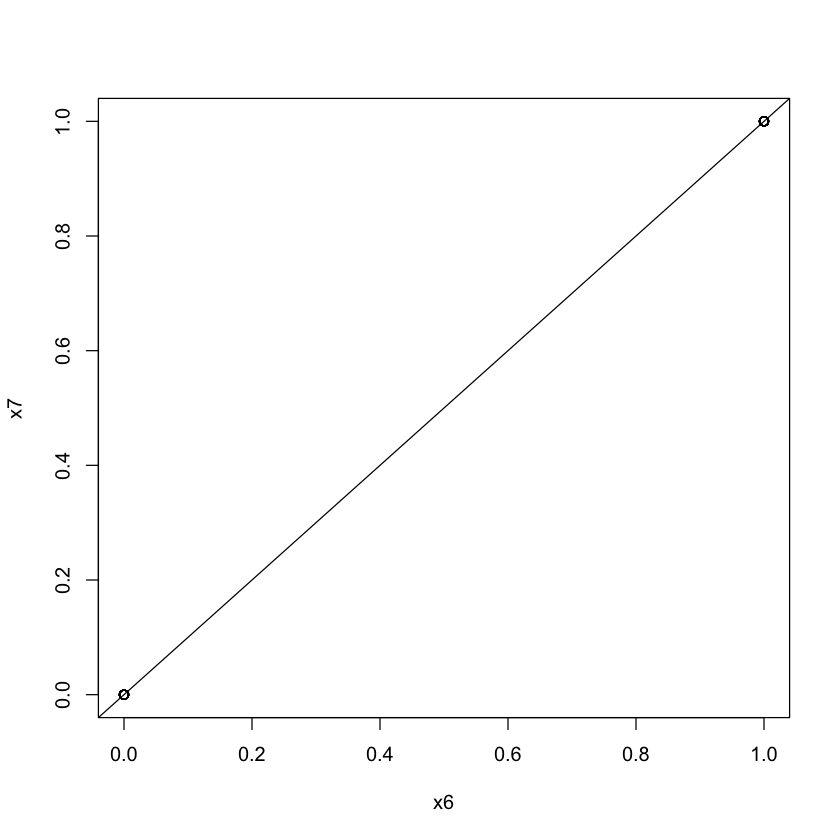

In [12]:
plot(x7 ~ x6) #x7 and x6 are linearly dependent
abline(lm(x7 ~ x6))

`geom_smooth()` using formula = 'y ~ x'


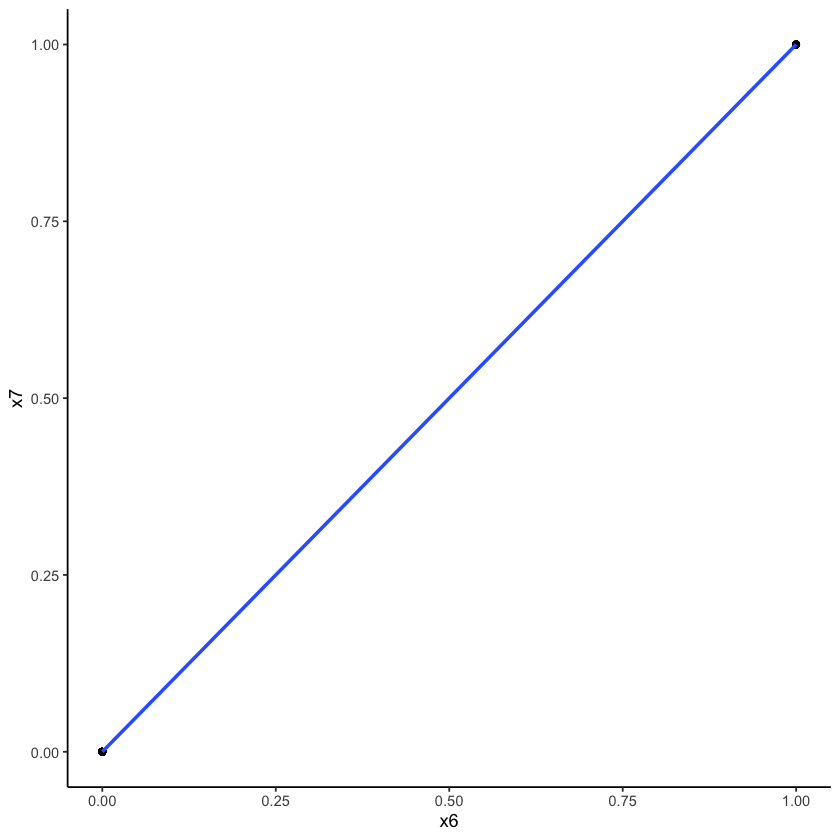

In [13]:
ggplot(dataframe, mapping = aes(x = x6, y = x7)) +
  geom_point() +
  geom_smooth(method = lm, se = FALSE) +
  theme_classic()

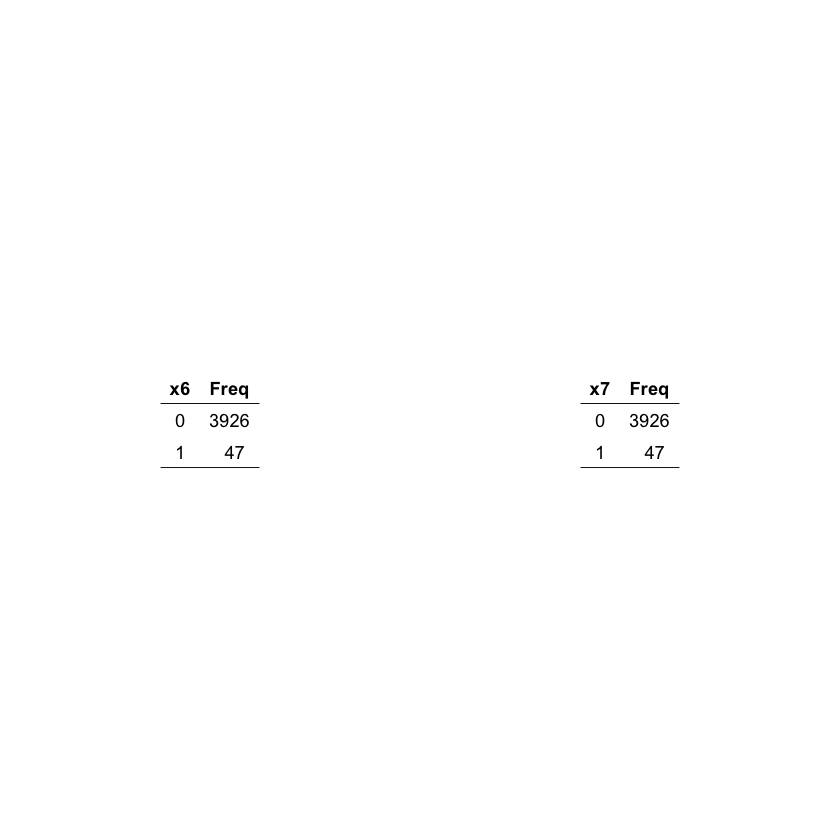

In [14]:
x6_correlation <- data.frame(table(x6))
x6_table <- ggtexttable(x6_correlation, rows = NULL, theme = ttheme("light"))

x7_correlation <- data.frame(table(x7))
x7_table <- ggtexttable(x7_correlation, rows = NULL, theme = ttheme("light"))

ggarrange(x6_table, x7_table)

When plotting x7 (isHighlighted) against x6 (isFlirtstar), it became apparent that the two variables have a perfect correlation (a value of 1). The contingency tables for the variables show that the variables have the same frequencies for the indicator variables. Since this implied the variables represented the same metric, I removed x7 from both models. In other words, the same users that are flirtstars are highlighted, and the same users that are not flirtstars are not highlighted.

In [15]:
# Remove the aliased coefficient (x7)
fit_one_updated <- lm(y1 ~ x1 + x2 + x3 + x4 + x5 + x6 + x8 + x9 + x10 
                      + x11 + x12 + x13 + x14 + x15 + x16 + x17 + x18,
                      data = dataframe)

summary(fit_one_updated)


Call:
lm(formula = y1 ~ x1 + x2 + x3 + x4 + x5 + x6 + x8 + x9 + x10 + 
    x11 + x12 + x13 + x14 + x15 + x16 + x17 + x18, data = dataframe)

Residuals:
   Min     1Q Median     3Q    Max 
-931.6 -117.6  -45.6   20.3 8598.5 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   21.9306    69.9012   0.314 0.753737    
x1            -4.3638     2.8831  -1.514 0.130209    
x2            28.5409     1.3427  21.256  < 2e-16 ***
x3            33.1039    11.7293   2.822 0.004792 ** 
x4            18.0645    11.8875   1.520 0.128686    
x5           -26.2957    11.8491  -2.219 0.026528 *  
x6           -10.7548    51.4009  -0.209 0.834277    
x8           122.0653    27.9013   4.375 1.25e-05 ***
x9           -80.6458    36.3355  -2.219 0.026511 *  
x10          -84.9316    42.7869  -1.985 0.047214 *  
x11         -141.8618    54.8760  -2.585 0.009770 ** 
x12         -103.1459    36.2396  -2.846 0.004447 ** 
x13         -134.9870    40.9883  -3.293 0.000999 ***
x14 

In [16]:
# Remove the aliased coefficient (x7)
fit_two_updated <- lm(y2 ~ x1 + x2 + x3 + x4 + x5 + x6 + x8 + x9 + x10
                      + x11 + x12 + x13 + x14 + x15 + x16 + x17 + x18,
                      data = dataframe)

summary(fit_two_updated)


Call:
lm(formula = y2 ~ x1 + x2 + x3 + x4 + x5 + x6 + x8 + x9 + x10 + 
    x11 + x12 + x13 + x14 + x15 + x16 + x17 + x18, data = dataframe)

Residuals:
   Min     1Q Median     3Q    Max 
-18425  -2630  -1010    657 149726 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1861.42    1222.94   1.522 0.128068    
x1           -160.10      50.44  -3.174 0.001514 ** 
x2            564.93      23.49  24.049  < 2e-16 ***
x3            708.84     205.21   3.454 0.000558 ***
x4            364.28     207.97   1.752 0.079930 .  
x5           -355.64     207.30  -1.716 0.086319 .  
x6           -634.69     899.27  -0.706 0.480363    
x8           1906.35     488.14   3.905 9.57e-05 ***
x9           -344.57     635.70  -0.542 0.587832    
x10         -1030.02     748.57  -1.376 0.168905    
x11         -2062.18     960.07  -2.148 0.031779 *  
x12         -1810.00     634.02  -2.855 0.004329 ** 
x13         -2042.42     717.10  -2.848 0.004420 ** 
x14          -882.

In [17]:
vif(fit_one_updated)

vif(fit_two_updated)

x1       x2       x3       x4       x5       x6       x8       x9 
1.046864 1.155241 1.054567 1.097365 1.075039 1.010894 8.661822 9.855169 
     x10      x11      x12      x13      x14      x15      x16      x17 
3.559574 1.801635 8.725186 2.715736 1.354038 1.025109 1.013400 1.119541 
     x18 
1.109930

x1       x2       x3       x4       x5       x6       x8       x9 
1.046864 1.155241 1.054567 1.097365 1.075039 1.010894 8.661822 9.855169 
     x10      x11      x12      x13      x14      x15      x16      x17 
3.559574 1.801635 8.725186 2.715736 1.354038 1.025109 1.013400 1.119541 
     x18 
1.109930

None of the variables have a VIF over 10, so there's no issues with multicollinearity in both models. Most of the VIFs are about 1.

# 4. Exploratory Analysis

## 4.1. Histograms

In [18]:
dataframe_y1 <- data.frame(x1, x2, x3, x4, x5, x6, x8, x9, x10, 
                           x11, x12, x13, x14, x15, x16, x17, x18, y1)
dataframe_y2 <- data.frame(x1, x2, x3, x4, x5, x6, x8, x9, x10, 
                           x11, x12, x13, x14, x15, x16, x17, x18, y2)

In [19]:
max(dataframe_y1$y1)

[1] 9288

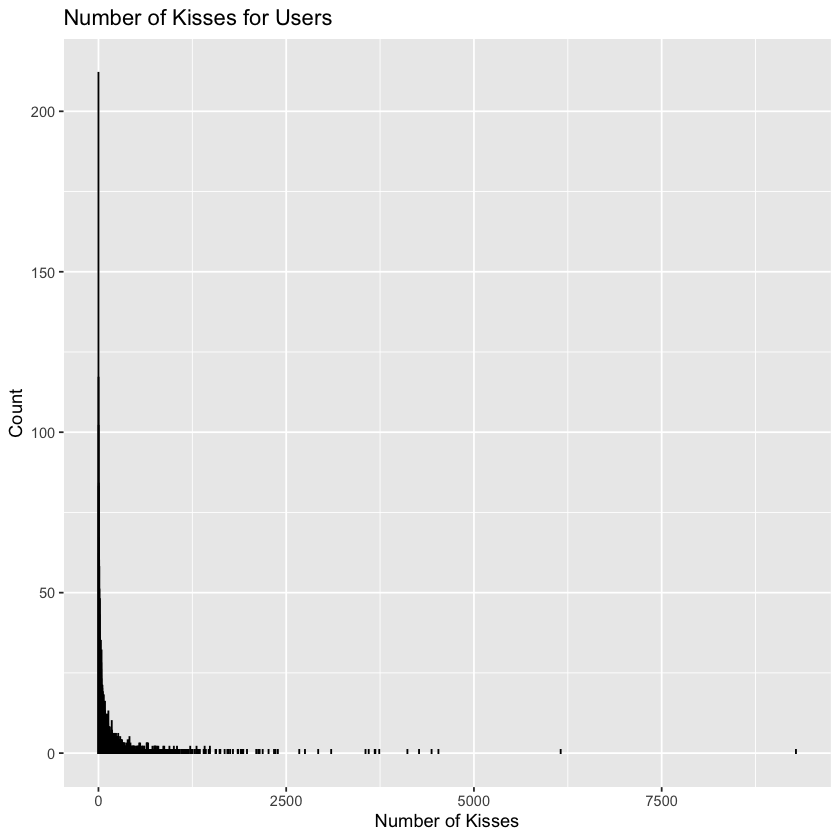

In [20]:
ggplot(data = dataframe_y1, mapping = aes(y1)) +
  geom_bar(fill = "darkred", col = "black") +
  labs(title = "Number of Kisses for Users", x = "Number of Kisses", y = "Count")

The histogram displays the distribution of user profiles based on the number of kisses they received and is right skewed with clear outliers.

In [21]:
max(dataframe_y2$y2)

[1] 164425

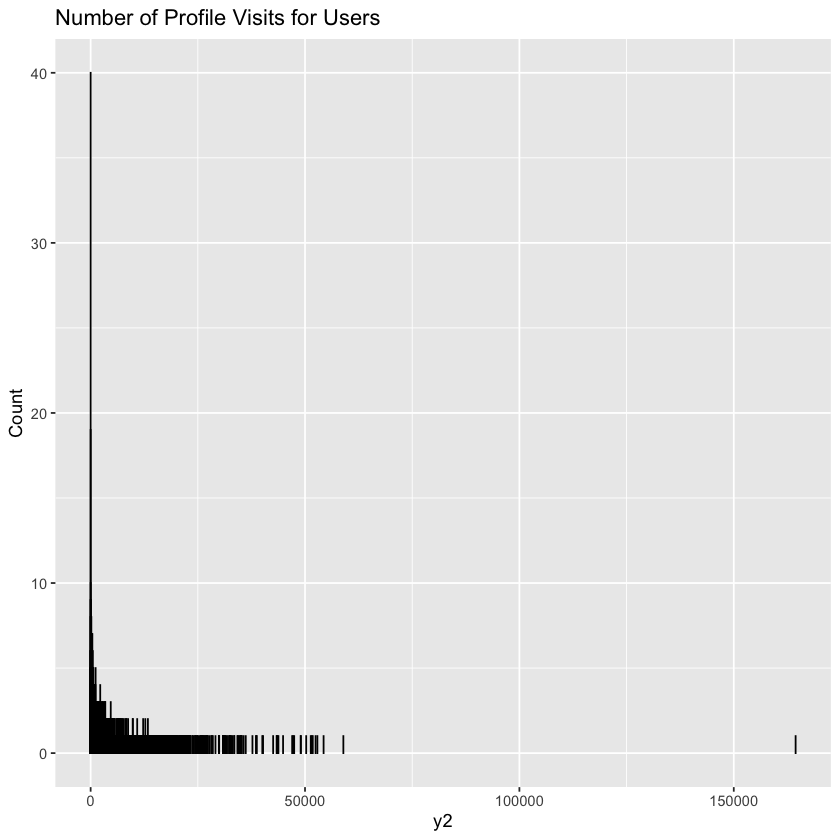

In [22]:
ggplot(data = dataframe_y2, mapping = aes(y2)) +
  geom_bar(fill = "pink", col = "black") +
  labs(title = "Number of Profile Visits for Users", "Number of Profile Visits", y = "Count")

The histogram displays the distribution of user profiles based on the number of profile visits they received and is right skewed with clear outliers.

## 4.2. Correlation Matrix

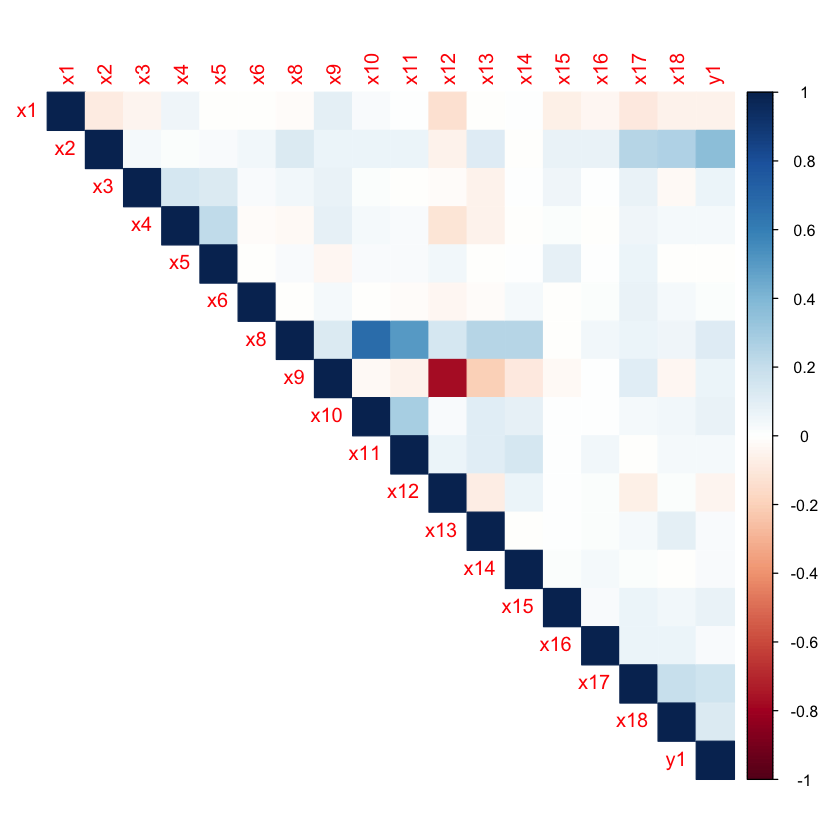

In [23]:
cor_y1 <- cor(dataframe_y1)
corrplot(cor_y1, method = "color", type = "upper")

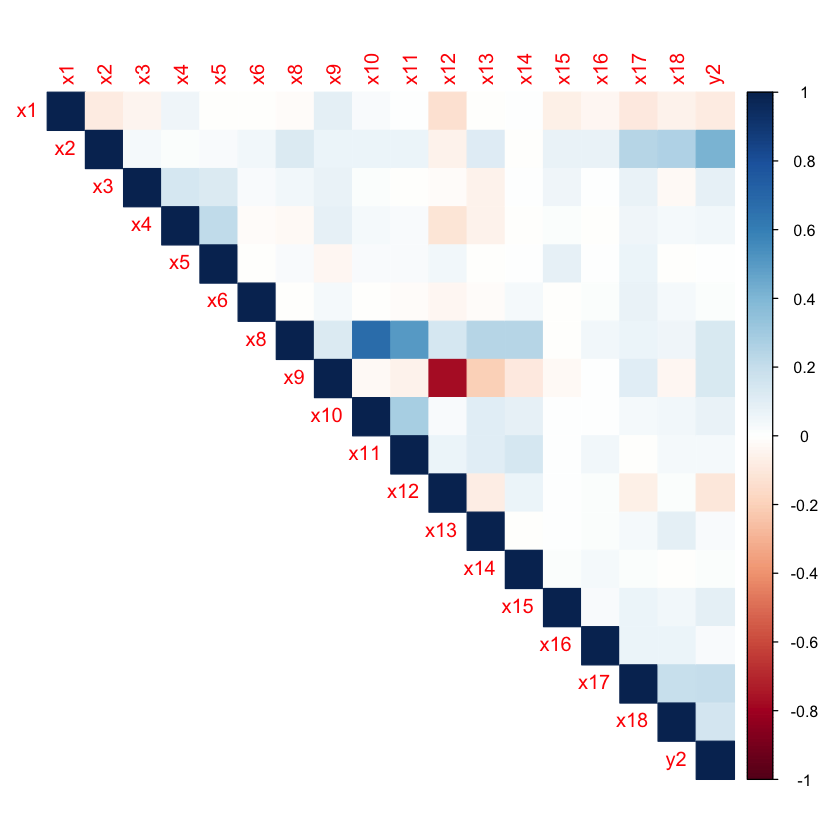

In [24]:
cor_y2 <- cor(dataframe_y2)
corrplot(cor_y2, method = "color", type = "upper")

Looking at both matrices, x<sub>12</sub> (French) and x<sub>13</sub> (Italian) have a direct negative correlation with one another. Conversely, the opposite trend can be seen with x<sub>10</sub> (English) and x<sub>11</sub> (Spanish) as they have a positive correlation. x<sub>1</sub> (age) is somewhat negatively correlated with both the number of profile visits and the number of kisses received by a profile. x<sub>2</sub> (number of pictures) is somewhat positively correlated with both the number of profile visits and the number of kisses received by a profile.  

## 4.3. Scatter Plots

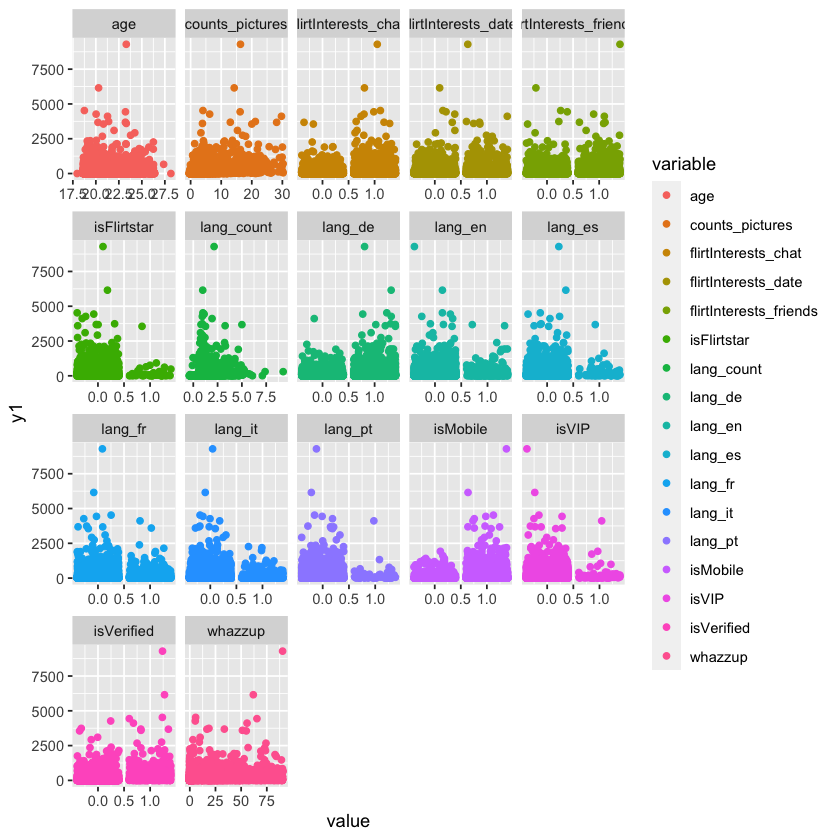

In [25]:
spotData_y1 <- subset(dataframe_y1)

spotData_y1_melt <- melt(spotData_y1, id.vars = 'y1')

spotData_y1_melt$variable <- factor(spotData_y1_melt$variable,
                                    label = c("age", "counts_pictures",
                                              "flirtInterests_chat",
                                              "flirtInterests_date",
                                              "flirtInterests_friends", "isFlirtstar",
                                              "lang_count", "lang_de",
                                              "lang_en", "lang_es", "lang_fr", "lang_it",
                                              "lang_pt", "isMobile", "isVIP", "isVerified",
                                              "whazzup"))

ggplot(spotData_y1_melt) +
  geom_jitter(aes(value, y1, colour = variable), ) +
  facet_wrap(~ variable, scales = "free_x")

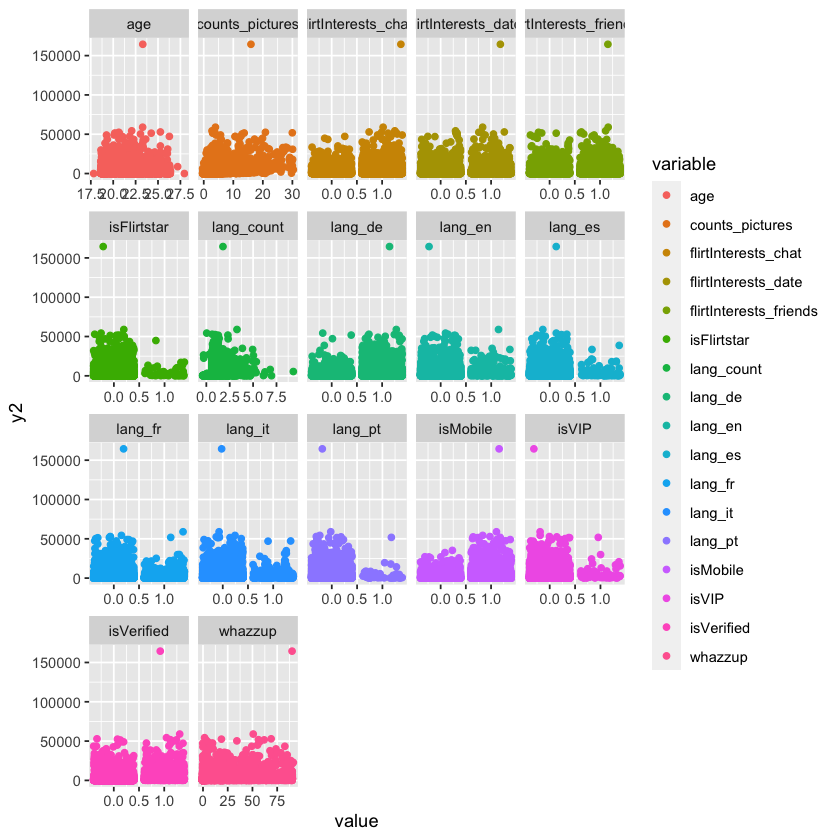

In [26]:
spotData_y2 <- subset(dataframe_y2)

spotData_y2_melt <- melt(spotData_y2, id.vars = "y2")

spotData_y2_melt$variable <- factor(spotData_y2_melt$variable,
                                    label = c("age", "counts_pictures",
                                              "flirtInterests_chat",
                                              "flirtInterests_date", 
                                              "flirtInterests_friends", "isFlirtstar",
                                              "lang_count", "lang_de",
                                              "lang_en", "lang_es", "lang_fr", "lang_it",
                                              "lang_pt", "isMobile", "isVIP", "isVerified",
                                              "whazzup"))

ggplot(spotData_y2_melt) +
  geom_jitter(aes(value, y2, colour = variable), ) +
  facet_wrap(~ variable, scales = "free_x")

## 4.4. Added-Variable Plots

Warning message in lsfit(mod.mat[, -var], cbind(mod.mat[, var], response), wt = wt, :
"'X' matrix was collinear"
Warning message in lsfit(mod.mat[, -var], cbind(mod.mat[, var], response), wt = wt, :
"'X' matrix was collinear"
Warning message in lsfit(mod.mat[, -var], cbind(mod.mat[, var], response), wt = wt, :
"'X' matrix was collinear"
Warning message in lsfit(mod.mat[, -var], cbind(mod.mat[, var], response), wt = wt, :
"'X' matrix was collinear"
Warning message in lsfit(mod.mat[, -var], cbind(mod.mat[, var], response), wt = wt, :
"'X' matrix was collinear"
Warning message in lsfit(mod.mat[, -var], cbind(mod.mat[, var], response), wt = wt, :
"'X' matrix was collinear"
Warning message in lsfit(mod.mat[, -var], cbind(mod.mat[, var], response), wt = wt, :
"'X' matrix was collinear"
Warning message in lsfit(mod.mat[, -var], cbind(mod.mat[, var], response), wt = wt, :
"'X' matrix was collinear"
Warning message in lsfit(mod.mat[, -var], cbind(mod.mat[, var], response), wt = wt, :
"'X' matri

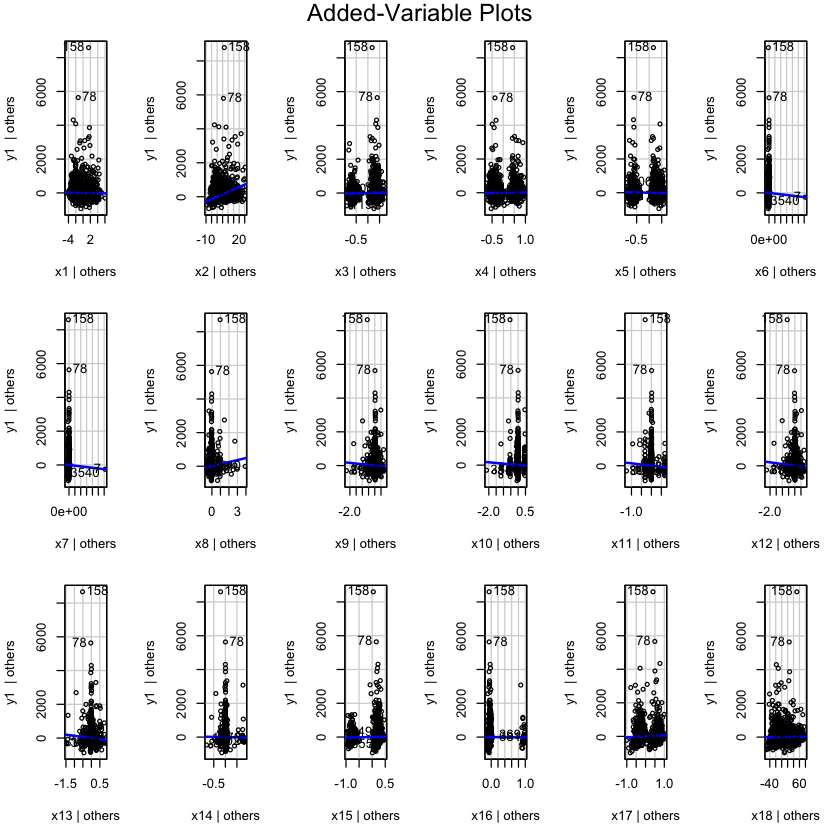

In [27]:
avPlots(fit_one, layout = c(3, 6))

Warning message in lsfit(mod.mat[, -var], cbind(mod.mat[, var], response), wt = wt, :
"'X' matrix was collinear"
Warning message in lsfit(mod.mat[, -var], cbind(mod.mat[, var], response), wt = wt, :
"'X' matrix was collinear"
Warning message in lsfit(mod.mat[, -var], cbind(mod.mat[, var], response), wt = wt, :
"'X' matrix was collinear"
Warning message in lsfit(mod.mat[, -var], cbind(mod.mat[, var], response), wt = wt, :
"'X' matrix was collinear"
Warning message in lsfit(mod.mat[, -var], cbind(mod.mat[, var], response), wt = wt, :
"'X' matrix was collinear"
Warning message in lsfit(mod.mat[, -var], cbind(mod.mat[, var], response), wt = wt, :
"'X' matrix was collinear"
Warning message in lsfit(mod.mat[, -var], cbind(mod.mat[, var], response), wt = wt, :
"'X' matrix was collinear"
Warning message in lsfit(mod.mat[, -var], cbind(mod.mat[, var], response), wt = wt, :
"'X' matrix was collinear"
Warning message in lsfit(mod.mat[, -var], cbind(mod.mat[, var], response), wt = wt, :
"'X' matri

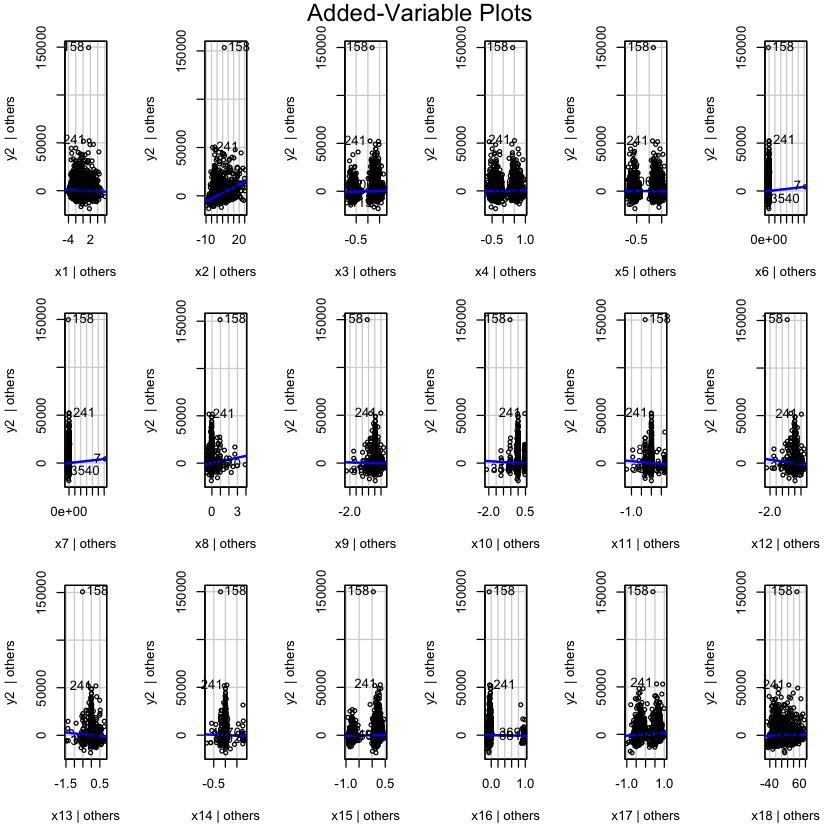

In [28]:
avPlots(fit_two, layout = c(3, 6))

Based on the scatterplots and the added-variable plots, there appears to be a linear relationship between the response variables

# 5. Variable Selection and Model Building

## 5.1. 1st Model (y1)

In [29]:
# Test each predictor as the sole predictor of each response variable
simple_regression_r_squared_y1 = c()
for (i in 1:17) {
  simple_regression_r_squared_y1 <- append(simple_regression_r_squared_y1, summary(lm(dataframe_y1$y1 ~ dataframe_y1[, i]))$adj.r.squared)
}
max(simple_regression_r_squared_y1)

[1] 0.1352332

In [30]:
# Unhelpful, trying all combinations of 2 predictors for each response variable
double_regression_r_squared_y1 = c()
for (i in 1:17) {
  for (j in 1:17) {
    double_regression_r_squared_y1 <- append(double_regression_r_squared_y1, summary(lm(dataframe_y1$y1 ~ dataframe_y1[, i] + dataframe_y1[, j]))$adj.r.squared)
  }
}
max(double_regression_r_squared_y1)

[1] 0.1408126

In [31]:
# Brute-Force Method using all combinations of 5 predictors
large_y1 <- 0
for (i in 1:13) {
  for (j in (i + 1):14) {
    for (k in (j + 1):15) {
      for (l in (k + 1):16) {
        for (m in (l + 1):17) {
          if ((curr <- summary(lm(dataframe_y1$y1 ~ dataframe_y1[, i] + dataframe_y1[, j] + dataframe_y1[, k] + dataframe_y1[, l] + dataframe_y1[, m]))$adj.r.squared) > large_y1) {
            large_y1 <- curr
            largeIndex_y1 <- c(i, j, k, l, m)
          }
        }
      }
    }
  }
}
largeIndex_y1

[1]  2  3  7 14 16

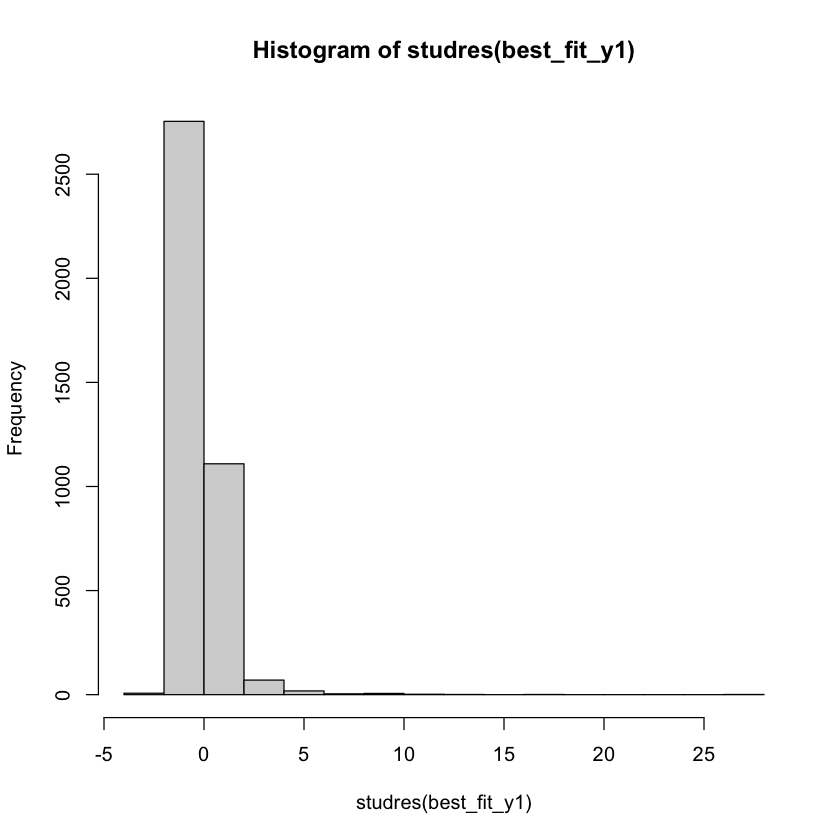

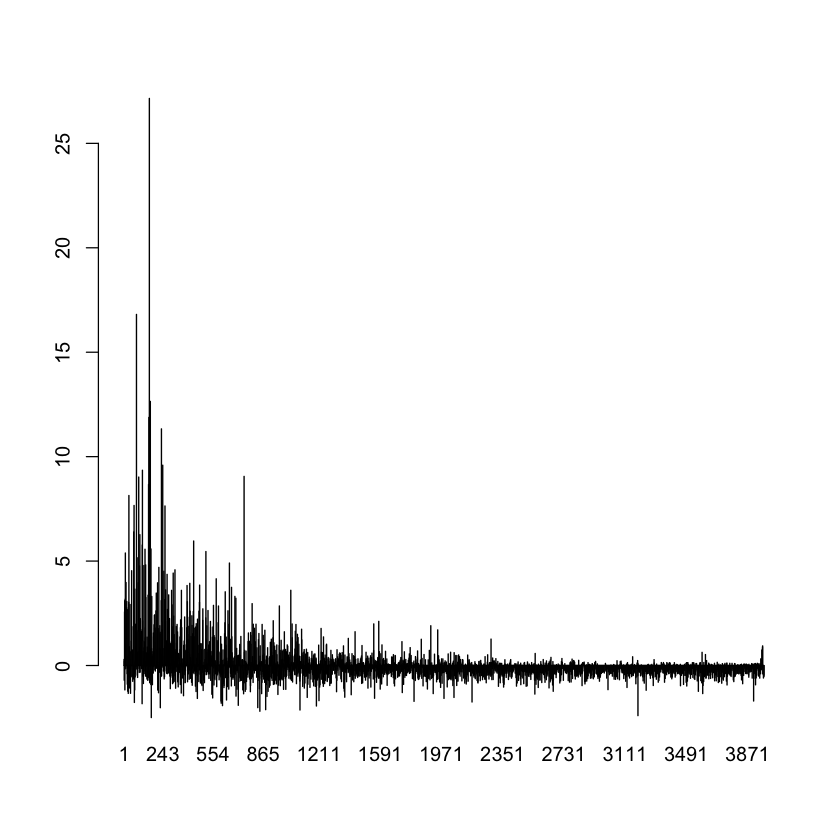

In [32]:
# Best Adjusted R-Squared with x2, x3, x8, x15, x17
best_fit_plot_y1 <- lm(y1 ~ x2 + x3 + x8 + x15 + x17, data = dataframe_y1)
best_fit_y1 <- lm(y1 ~ x2 + x3 + x8 + x15 + x17, data = dataframe_y1)
hist(studres(best_fit_y1))
barplot(studres(best_fit_y1))

There are huge residuals, where the observation is an outlier. Removing the largest residuals will just make the other large residuals even larger, so let's try removing all observations with residuals greater than 4, then refitting the model, and repeating the process until there are no longer any observations with residuals greater than 4.

### 5.1.1. Residual Analysis

In [33]:
# Remove observations with residuals greater than 4
remove_y1 <- dataframe_y1
while (max(abs(studres(best_fit_y1))) > 4) {
  remove_y1 <- remove_y1[which(abs(studres(best_fit_y1)) < 4), ]
  best_fit_y1 <- lm(data = remove_y1, y1 ~ x2 + x3 + x8 + x15 + x17)
}

In [34]:
remove_observations_y1 <- remove_y1
optimal_fit_y1 <- lm(y1 ~ x2 + x3 + x8 + x15 + x17, data = remove_observations_y1)


Call:
lm(formula = y1 ~ x2 + x3 + x8 + x15 + x17, data = remove_observations_y1)

Residuals:
    Min      1Q  Median      3Q     Max 
-303.60  -51.88  -27.92   22.90  364.59 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2162     4.6333   0.478  0.63245    
x2           10.8444     0.3883  27.931  < 2e-16 ***
x3            8.2289     3.1314   2.628  0.00863 ** 
x8           17.1290     2.6970   6.351  2.4e-10 ***
x15           3.6908     3.4552   1.068  0.28549    
x17          11.7710     3.8603   3.049  0.00231 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 91.58 on 3666 degrees of freedom
Multiple R-squared:  0.2139,	Adjusted R-squared:  0.2128 
F-statistic: 199.5 on 5 and 3666 DF,  p-value: < 2.2e-16


x2       x3       x8      x15      x17 
1.071698 1.011043 1.018353 1.009844 1.063524

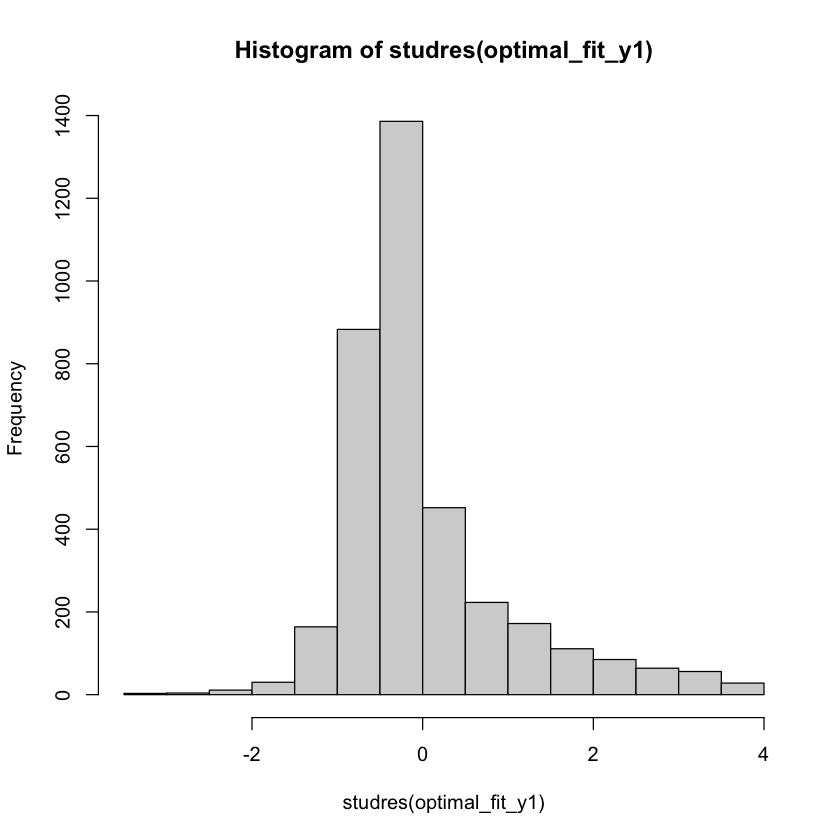

In [35]:
# 3672/3973 observations left (92.4% of observations)
summary(optimal_fit_y1) # significant p-values

hist(studres(optimal_fit_y1)) # normal

vif(optimal_fit_y1) # no issues with multicollinearity

The histogram appears to be close to bell-shaped.

In [36]:
# See what happens to adjusted r-squared using dataset without outliers
summary(lm(y1 ~ x2 + x3 + x8 + x15, data = remove_observations_y1)) # slightly worse
summary(lm(y1 ~ x2 + x3 + x8 + x17, data = remove_observations_y1)) # same
summary(lm(y1 ~ x2 + x3 + x15 + x17, data = remove_observations_y1)) # worse
summary(lm(y1 ~ x2 + x8 + x15 + x17, data = remove_observations_y1)) # slightly worse
summary(lm(y1 ~ x3 + x8 + x15 + x17, data = remove_observations_y1)) # terrible


Call:
lm(formula = y1 ~ x2 + x3 + x8 + x15, data = remove_observations_y1)

Residuals:
    Min      1Q  Median      3Q     Max 
-312.95  -52.26  -28.29   23.28  373.09 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.4486     4.6380   0.528  0.59757    
x2           11.1028     0.3793  29.270  < 2e-16 ***
x3            8.8837     3.1276   2.840  0.00453 ** 
x8           17.3933     2.6986   6.445  1.3e-10 ***
x15           4.1425     3.4559   1.199  0.23073    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 91.69 on 3667 degrees of freedom
Multiple R-squared:  0.2119,	Adjusted R-squared:  0.211 
F-statistic: 246.5 on 4 and 3667 DF,  p-value: < 2.2e-16



Call:
lm(formula = y1 ~ x2 + x3 + x8 + x17, data = remove_observations_y1)

Residuals:
    Min      1Q  Median      3Q     Max 
-303.27  -51.83  -28.54   23.07  365.41 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.7725     3.9676   1.203  0.22911    
x2           10.8681     0.3876  28.037  < 2e-16 ***
x3            8.3981     3.1275   2.685  0.00728 ** 
x8           17.0576     2.6962   6.327 2.81e-10 ***
x17          11.9478     3.8569   3.098  0.00196 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 91.58 on 3667 degrees of freedom
Multiple R-squared:  0.2136,	Adjusted R-squared:  0.2128 
F-statistic: 249.1 on 4 and 3667 DF,  p-value: < 2.2e-16



Call:
lm(formula = y1 ~ x2 + x3 + x15 + x17, data = remove_observations_y1)

Residuals:
    Min      1Q  Median      3Q     Max 
-312.23  -51.97  -28.97   22.35  403.68 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   19.510      3.769   5.177 2.38e-07 ***
x2            11.117      0.388  28.655  < 2e-16 ***
x3             9.079      3.145   2.887  0.00392 ** 
x15            3.147      3.473   0.906  0.36489    
x17           12.559      3.879   3.238  0.00122 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 92.07 on 3667 degrees of freedom
Multiple R-squared:  0.2052,	Adjusted R-squared:  0.2044 
F-statistic: 236.7 on 4 and 3667 DF,  p-value: < 2.2e-16



Call:
lm(formula = y1 ~ x2 + x8 + x15 + x17, data = remove_observations_y1)

Residuals:
    Min      1Q  Median      3Q     Max 
-300.76  -51.24  -28.03   23.26  365.64 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.4477     4.3480   1.483  0.13818    
x2           10.8577     0.3885  27.945  < 2e-16 ***
x8           17.4321     2.6967   6.464 1.15e-10 ***
x15           4.1500     3.4535   1.202  0.22957    
x17          12.4666     3.8544   3.234  0.00123 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 91.66 on 3667 degrees of freedom
Multiple R-squared:  0.2124,	Adjusted R-squared:  0.2115 
F-statistic: 247.2 on 4 and 3667 DF,  p-value: < 2.2e-16



Call:
lm(formula = y1 ~ x3 + x8 + x15 + x17, data = remove_observations_y1)

Residuals:
    Min      1Q  Median      3Q     Max 
-219.51  -62.84  -37.25   27.16  610.93 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   31.809      4.967   6.404  1.7e-10 ***
x3             9.370      3.448   2.718   0.0066 ** 
x8            25.445      2.952   8.621  < 2e-16 ***
x15            9.215      3.798   2.426   0.0153 *  
x17           35.309      4.148   8.512  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 100.8 on 3667 degrees of freedom
Multiple R-squared:  0.04659,	Adjusted R-squared:  0.04555 
F-statistic:  44.8 on 4 and 3667 DF,  p-value: < 2.2e-16


In [37]:
# Remove x15 since it is not contributing to the model
# Attempt to add a predictor to the model
large_y1_add <- 0.2128
largeIndex_y1_add <- 0 # If it's still 0 after the for loop, there's no predictor that makes the model better
for (i in 1:17) {
  if ((curr <- summary(lm(remove_observations_y1$y1 ~ remove_observations_y1$x2 + remove_observations_y1$x3 + remove_observations_y1$x8 + remove_observations_y1$x17 + remove_observations_y1[, i]))$adj.r.squared) > large_y1_add) {
    large_y1_add <- curr
    largeIndex_y1_add <- i
  }
}

In [38]:
# x18 slightly improved the model, trying again including x1 in all the attempts
largeIndex_y1_add <- 0
for (i in 1:17) {
  if ((cur <- summary(lm(remove_observations_y1$y1 ~ remove_observations_y1$x2 + remove_observations_y1$x3 + remove_observations_y1$x8 + remove_observations_y1$x17 + remove_observations_y1$x18 + remove_observations_y1[, i]))$adj.r.squared) > large_y1_add) {
    large_y1_add <- curr
    largeIndex_y1_add <- i
  }
}

In [39]:
# x1 added a bit, so include x1 and try to add another predictor
largeIndex_y1_add <- 0
for (i in 1:17) {
  if ((cur <- summary(lm(remove_observations_y1$y1 ~ remove_observations_y1$x1 + remove_observations_y1$x2 + remove_observations_y1$x3 + remove_observations_y1$x8 + remove_observations_y1$x17 + remove_observations_y1$x18 + remove_observations_y1[, i]))$adj.r.squared) > large_y1_add) {
    large_y1_add <- curr
    largeIndex_y1_add <- i
  }
}

In [40]:
# x13 helped the model, including it now
largeIndex_y1_add <- 0
for (i in 1:17) {
  if ((cur <- summary(lm(remove_observations_y1$y1 ~ remove_observations_y1$x1 + remove_observations_y1$x2 + remove_observations_y1$x3 + remove_observations_y1$x8 + remove_observations_y1$x13 + remove_observations_y1$x17 + remove_observations_y1$x18 + remove_observations_y1[, i]))$adj.r.squared) > large_y1_add) {
    large_y1_add <- curr
    largeIndex_y1_add <- i
  }
}

In [41]:
# No other predictor additionally help the model significantly, so use as final model
final_fit_y1 <- lm(y1 ~ x1 + x2 + x3 + x8 + x13 + x17 + x18, data = remove_observations_y1)
summary(final_fit_y1)


Call:
lm(formula = y1 ~ x1 + x2 + x3 + x8 + x13 + x17 + x18, data = remove_observations_y1)

Residuals:
    Min      1Q  Median      3Q     Max 
-303.23  -51.58  -26.14   22.24  370.18 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  54.77077   17.85662   3.067  0.00218 ** 
x1           -2.39048    0.77670  -3.078  0.00210 ** 
x2           10.59340    0.39987  26.492  < 2e-16 ***
x3            7.94909    3.13033   2.539  0.01115 *  
x8           18.68720    2.76411   6.761 1.59e-11 ***
x13         -20.49341    7.19947  -2.847  0.00444 ** 
x17           8.92407    3.89433   2.292  0.02199 *  
x18           0.20692    0.06113   3.385  0.00072 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 91.27 on 3664 degrees of freedom
Multiple R-squared:  0.2197,	Adjusted R-squared:  0.2182 
F-statistic: 147.3 on 7 and 3664 DF,  p-value: < 2.2e-16


### 5.1.2. Conclusions:
<ul>
<li>x<sub>1</sub>: -2.4 kisses per year old</li>
<li>x<sub>2</sub>: +10.6 kisses per picture on your profile</li>
<li>x<sub>3</sub>: +7.9 kisses by labelling yourself "interesting in chatting"</li>
<li>x<sub>8</sub>: +18.7 kisses per language you speak</li>
<li>x<sub>13</sub>: -20.5 kisses for speaking Italian</li>
<li>x<sub>17</sub>: +8.85 kisses for being verified</li>
<li>x<sub>18</sub>: +0.21 kisses per character in your whazzup (about me) section</li>
</ul>

$Equation:$<br>
$y_1$ = $54.77077- 2.39048x_{1} + 10.59340x_{2} + 7.94909x_{3} + 18.68720x_{8} - 20.49341x_{13} + 8.92407x_{17} + 0.20692x_{18}$ 

## 5.2. 2nd Model (y2)

In [42]:
# Test each predictor as the sole predictor of each response variable
simple_regression_r_squared_y2 = c()
for (i in 1:17) {
  simple_regression_r_squared_y2 <- append(simple_regression_r_squared_y2, summary(lm(dataframe_y2$y2 ~ dataframe_y2[, i]))$adj.r.squared)
}
max(simple_regression_r_squared_y2)

[1] 0.174056

In [43]:
# Unhelpful, trying all combinations of 2 predictors for each response variable 
double_regression_r_squared_y2 = c()
for (i in 1:17) {
  for (j in 1:17) {
    double_regression_r_squared_y2 <- append(double_regression_r_squared_y2, summary(lm(dataframe_y2$y2 ~ dataframe_y2[, i] + dataframe_y2[, j]))$adj.r.squared)
  }
}
max(double_regression_r_squared_y2)

[1] 0.1862453

In [44]:
# Brute-Force Method using all combinations of 5 predictors 
large_y2 <- 0
for (i in 1:13) {
  for (j in (i+1):14) {
    for (k in (j+1):15) {
      for (l in (k+1):16) {
        for (m in (l+1):17) {
          if ((curr <- summary(lm(dataframe_y2$y2 ~ dataframe_y2[, i] + dataframe_y2[, j] + dataframe_y2[, k] + dataframe_y2[, l] + dataframe_y2[, m]))$adj.r.squared) > large_y2) {
            large_y2 <- curr
            largeIndex_y2 <- c(i, j, k, l, m)
          }
        }
      }
    }
  }
}
largeIndex_y2

[1]  2  7  8 14 16

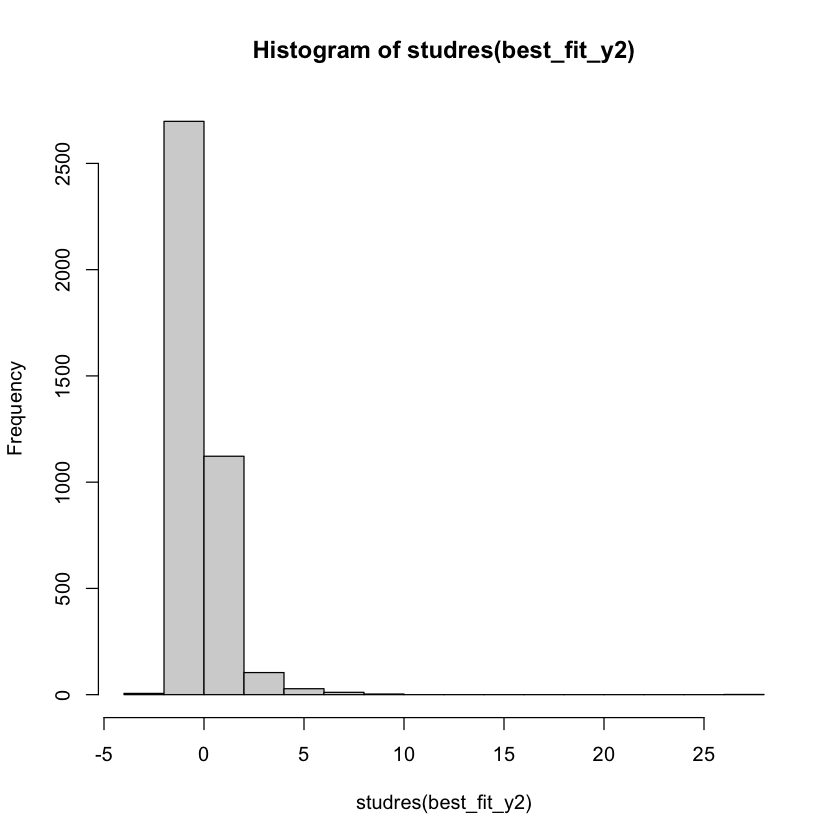

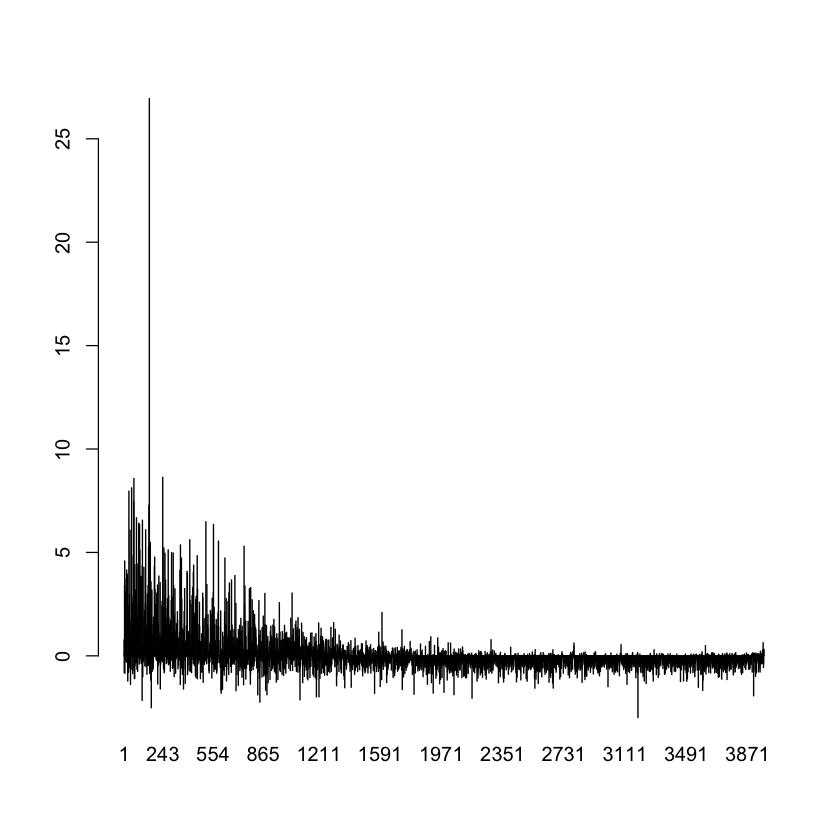

In [45]:
# Best Adjusted R-Squared with x2, x8, x9, x15, and x17
best_fit_y2 <- lm(y2 ~ x2 + x8 + x9 + x15 + x17, data = dataframe_y2)
hist(studres(best_fit_y2))
barplot(studres(best_fit_y2))

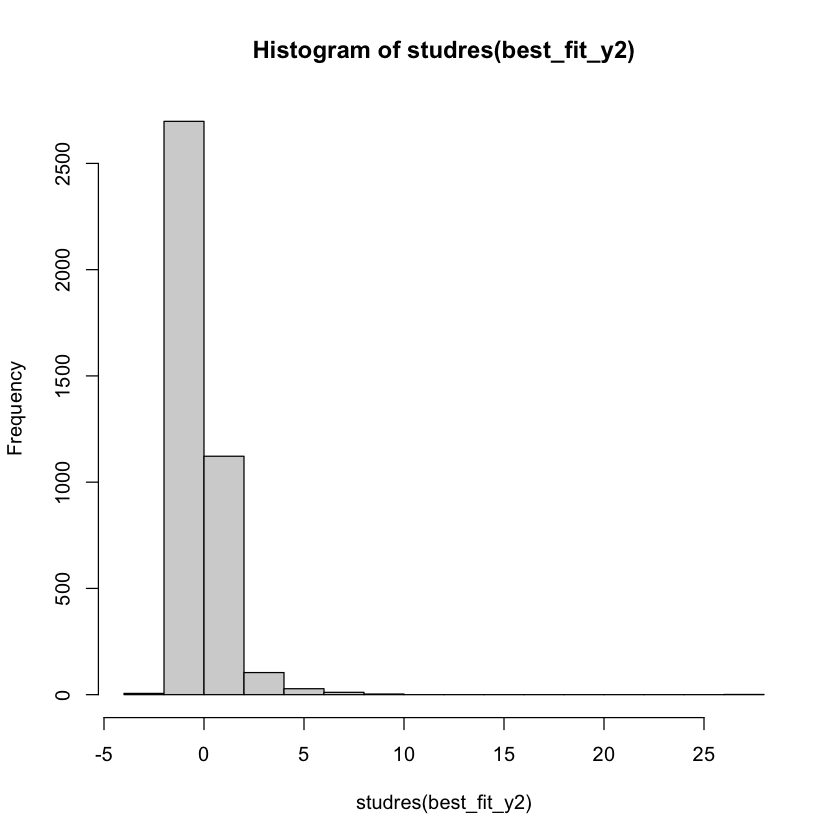

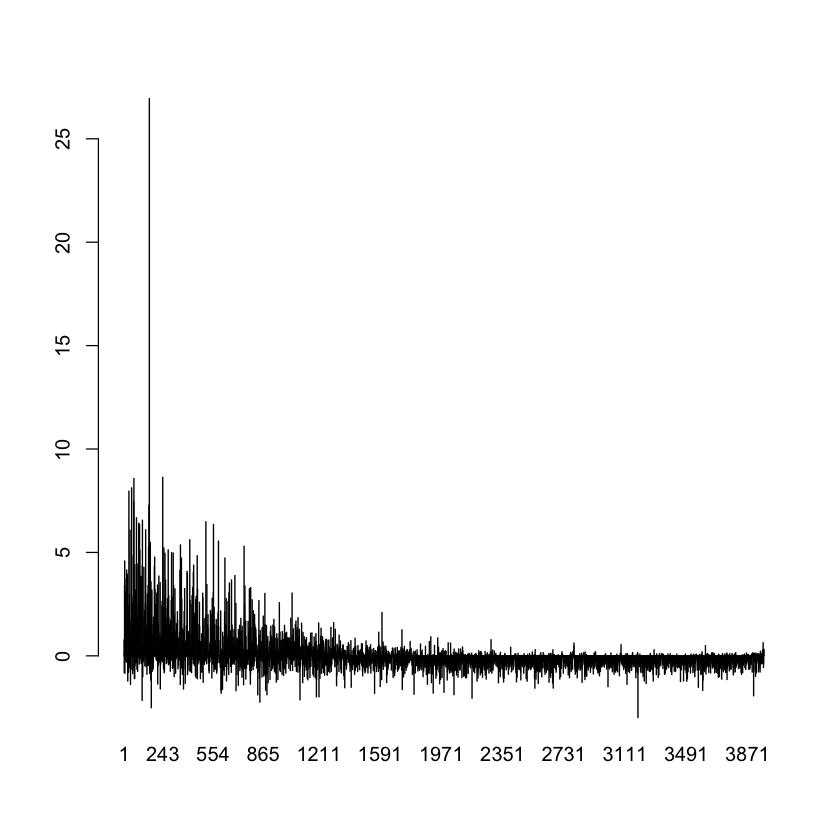

In [46]:
# Best Adjusted R-Squared with x2, x8, x9, x15, and x17
best_fit_plot_y2 <- lm(y2 ~ x2 + x8 + x9 + x15 + x17, data = dataframe_y2)
best_fit_y2 <- lm(y2 ~ x2 + x8 + x9 + x15 + x17, data = dataframe_y2)
hist(studres(best_fit_y2))
barplot(studres(best_fit_y2))

Just like the first model, there are huge residuals. Let's remove the observations with residuals greater than 4 again.

### 5.2.1. Residual Analysis

In [47]:
# Remove observations with residuals greater than 4
remove_y2 <- dataframe_y2
while(max(abs(studres(best_fit_y2))) > 4) {
  remove_y2 <- remove_y2[which(abs(studres(best_fit_y2)) < 4), ]
  best_fit_y2 <- lm(y2 ~ x2 + x8 + x9 + x15 + x17, data = remove_y2)
}

In [48]:
remove_observations_y2 <- remove_y2
optimal_fit_y2 <- lm(y2 ~ x2 + x8 + x9 + x15 + x17, data = remove_observations_y2)


Call:
lm(formula = y2 ~ x2 + x8 + x9 + x15 + x17, data = remove_observations_y2)

Residuals:
    Min      1Q  Median      3Q     Max 
-7952.3 -1529.3  -716.4   633.9 10728.9 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -379.39     137.65  -2.756  0.00588 ** 
x2            367.73      11.09  33.153  < 2e-16 ***
x8            437.61      80.16   5.459 5.09e-08 ***
x9            582.65      93.39   6.239 4.90e-10 ***
x15           290.12     101.53   2.857  0.00429 ** 
x17           568.99     112.70   5.049 4.66e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2723 on 3758 degrees of freedom
Multiple R-squared:  0.2783,	Adjusted R-squared:  0.2774 
F-statistic: 289.9 on 5 and 3758 DF,  p-value: < 2.2e-16


x2       x8       x9      x15      x17 
1.066357 1.029139 1.024880 1.008682 1.063517

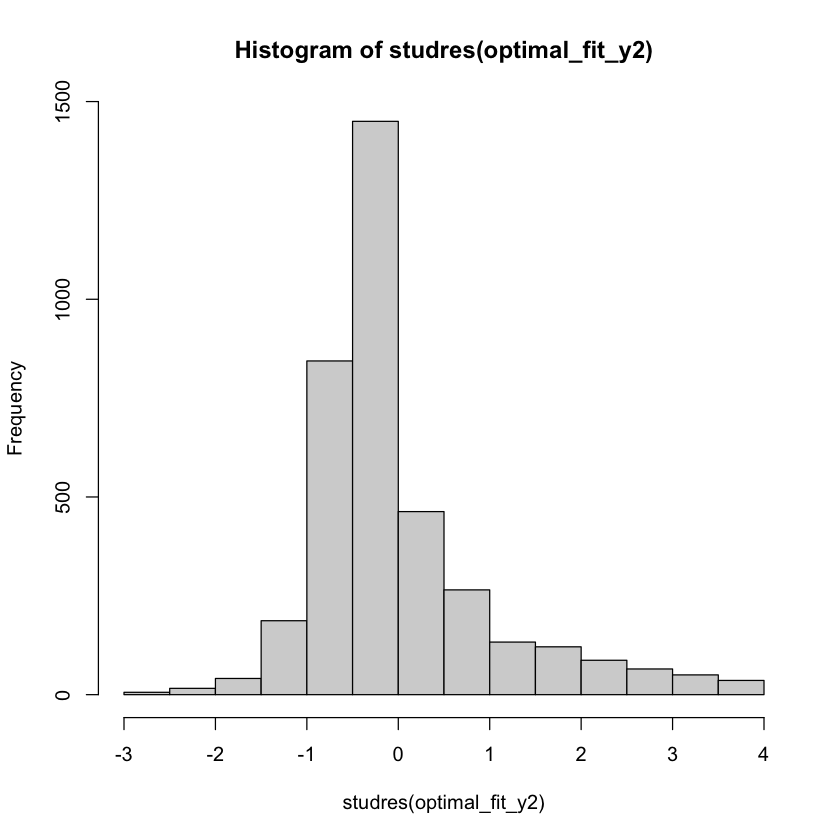

In [49]:
# 3758/3973 observations (94.7% of observations)
summary(optimal_fit_y2)

hist(studres(optimal_fit_y2))

vif(optimal_fit_y2) # no issues with multicollinearity

The histogram appears to be close to bell-shaped.

In [50]:
# See what happens to adjusted r-squared using dataset without outliers
summary(lm(y2 ~ x2 + x8 + x9 + x15, data = remove_observations_y2)) # slightly worse
summary(lm(y2 ~ x2 + x8 + x9 + x17, data = remove_observations_y2)) # slightly worse
summary(lm(y2 ~ x2 + x8 + x15 + x17, data = remove_observations_y2)) # slightly worse
summary(lm(y2 ~ x2 + x9 + x15 + x17, data = remove_observations_y2)) # slightly worse
summary(lm(y2 ~ x3 + x9 + x15 + x17, data = remove_observations_y2)) # terrible


Call:
lm(formula = y2 ~ x2 + x8 + x9 + x15, data = remove_observations_y2)

Residuals:
    Min      1Q  Median      3Q     Max 
-8357.0 -1536.2  -747.5   651.8 11171.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -372.73     138.09  -2.699  0.00698 ** 
x2            379.65      10.87  34.917  < 2e-16 ***
x8            449.15      80.39   5.587 2.47e-08 ***
x9            620.69      93.39   6.646 3.44e-11 ***
x15           318.10     101.71   3.127  0.00178 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2732 on 3759 degrees of freedom
Multiple R-squared:  0.2734,	Adjusted R-squared:  0.2727 
F-statistic: 353.6 on 4 and 3759 DF,  p-value: < 2.2e-16



Call:
lm(formula = y2 ~ x2 + x8 + x9 + x17, data = remove_observations_y2)

Residuals:
    Min      1Q  Median      3Q     Max 
-7915.7 -1518.0  -743.6   642.6 10780.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -164.44     115.39  -1.425    0.154    
x2            369.37      11.09  33.315  < 2e-16 ***
x8            433.38      80.22   5.402 7.00e-08 ***
x9            571.74      93.40   6.121 1.02e-09 ***
x17           586.56     112.64   5.207 2.02e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2725 on 3759 degrees of freedom
Multiple R-squared:  0.2768,	Adjusted R-squared:  0.276 
F-statistic: 359.6 on 4 and 3759 DF,  p-value: < 2.2e-16



Call:
lm(formula = y2 ~ x2 + x8 + x15 + x17, data = remove_observations_y2)

Residuals:
    Min      1Q  Median      3Q     Max 
-8318.9 -1502.2  -746.0   605.8 10892.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -70.34     129.07  -0.545   0.5858    
x2            368.67      11.15  33.075  < 2e-16 ***
x8            496.59      80.00   6.207 5.98e-10 ***
x15           264.22     101.96   2.591   0.0096 ** 
x17           625.71     112.90   5.542 3.19e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2736 on 3759 degrees of freedom
Multiple R-squared:  0.2708,	Adjusted R-squared:  0.2701 
F-statistic: 349.1 on 4 and 3759 DF,  p-value: < 2.2e-16



Call:
lm(formula = y2 ~ x2 + x9 + x15 + x17, data = remove_observations_y2)

Residuals:
    Min      1Q  Median      3Q     Max 
-8080.8 -1512.5  -730.2   652.1 11319.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    38.84     114.80   0.338  0.73516    
x2            373.81      11.08  33.744  < 2e-16 ***
x9            642.78      93.09   6.905 5.88e-12 ***
x15           279.88     101.90   2.747  0.00605 ** 
x17           586.53     113.09   5.187 2.25e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2733 on 3759 degrees of freedom
Multiple R-squared:  0.2726,	Adjusted R-squared:  0.2718 
F-statistic: 352.2 on 4 and 3759 DF,  p-value: < 2.2e-16



Call:
lm(formula = y2 ~ x3 + x9 + x15 + x17, data = remove_observations_y2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4054.6 -1928.6 -1123.3   837.2 18628.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1236.3      134.1   9.220  < 2e-16 ***
x3             298.8      105.3   2.839 0.004557 ** 
x9             702.2      106.4   6.600 4.67e-11 ***
x15            434.9      116.2   3.742 0.000185 ***
x17           1393.4      126.1  11.051  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3116 on 3759 degrees of freedom
Multiple R-squared:  0.05429,	Adjusted R-squared:  0.05328 
F-statistic: 53.94 on 4 and 3759 DF,  p-value: < 2.2e-16


In [51]:
# No removing anything, attempt to add something:
large_y2_add <- 0.2774
largeIndex_y2_add <- 0
for (i in 1:17) {
  if ((curr <- summary(lm(remove_observations_y2$y2 ~ remove_observations_y2$x2 + remove_observations_y2$x8 + remove_observations_y2$x9 + remove_observations_y2$x15 + remove_observations_y2$x17 + remove_observations_y2[, i]))$adj.r.squared) > large_y2_add) {
    large_y2_add <- curr
    largeIndex_y2_add <- i
  }
}

In [52]:
# x1 improved adjusted r-squared to 0.2834, so again including x1:
largeIndex_y2_add <- 0
for (i in 1:17) {
  if ((curr <- summary(lm(remove_observations_y2$y2 ~  remove_observations_y2$x1 + remove_observations_y2$x2 + remove_observations_y2$x8 + remove_observations_y2$x9 + remove_observations_y2$x15 + remove_observations_y2$x17 + remove_observations_y2[, i]))$adj.r.squared) > large_y2_add) {
    large_y2_add <- curr
    largeIndex_y2_add <- i
  }
}

In [53]:
# Fairly small improvement, let's see if adding 2 at once helps anything:
largeIndex_y2_add <- c(0, 0)
for (i in 1:16) {
  for (j in (i + 1):17) {
    if ((curr <- summary(lm(remove_observations_y2$y2 ~ remove_observations_y2$x1 + remove_observations_y2$x2 + remove_observations_y2$x8 + remove_observations_y2$x9 + remove_observations_y2$x15 + remove_observations_y2$x17 + remove_observations_y2[, i] + remove_observations_y2[, j]))$adj.r.squared) > large_y2_add) {
      large_y2_add <- curr
      largeIndex_y2_add <- c(i,j)
    }
  }
}

In [54]:
# Not much improvement, so we'll stop at x1, x2, x8, x9, x15, and x17
final_fit_y2 <- lm(y2 ~ x1 + x2 + x8 + x9 + x15 + x17, data = remove_observations_y2)
summary(final_fit_y2)


Call:
lm(formula = y2 ~ x1 + x2 + x8 + x9 + x15 + x17, data = remove_observations_y2)

Residuals:
    Min      1Q  Median      3Q     Max 
-8016.5 -1530.8  -709.7   629.6 11043.7 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2524.79     525.54   4.804 1.61e-06 ***
x1           -130.77      22.84  -5.724 1.12e-08 ***
x2            362.96      11.08  32.768  < 2e-16 ***
x8            428.62      79.84   5.368 8.42e-08 ***
x9            641.00      93.55   6.852 8.50e-12 ***
x15           261.88     101.23   2.587  0.00972 ** 
x17           518.65     112.57   4.607 4.21e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2711 on 3757 degrees of freedom
Multiple R-squared:  0.2846,	Adjusted R-squared:  0.2834 
F-statistic: 249.1 on 6 and 3757 DF,  p-value: < 2.2e-16


### 5.2.2. Conclusions
<ul>
<li>x1: -131 profile visits per year old you are</li>
<li>x2: +363 visits per picture on your profile</li>
<li>x8: +429 visits per language you speak</li>
<li>x9: +641 visits for speaking specifically German</li>
<li>x15: +262 visits for being on a mobile device</li>
<li>x17: +519 visits for having a verified account</li>
</ul>

$Equation:$<br>
$y_2$ = $2524.79 - 130.77x_{1} + 362.96x_{2} + 428.62x_{8} + 641.00x_{9} - 261.88x_{15} + 518.65x_{17}$ 

## 5.3. Conclusions
<p style = "text-indent: 25px;">
The low adjusted r-squared are due to the nature of social media apps, because more people want their profile to get attention then people who want to give other's attention, at the end of the day lots of chance is required to get noticed, and this app likely creates "viral" profiles in the same way traditional social media does, in a way that would throw off any linear  regression model in a way that is impossible to effectively account for through linearization (we tried).
</p>

<p style = "text-indent: 25px;">
We also can't reasonably determine whether these are correlatory effects,
where people who get more attention are more likely to post more pictures
or where verified users are more likely to be popular through outside influence,
rather than the verified badge, or whether the predictor actually caused the 
responses, we can only observe tha these factors correlated to profile
attention, and recommend users looking to bring more attention to their profile
focus on these factors
</p>


# 6. Residual Analysis

After the residual analysis was performed, I removed:
<ul>
<li>301/3973 (7.6%) observations in the 1st model (3672/3973 (92.4%) left)</li>
<li>215/3973 (5.3%) observations in the 2nd model (3758/3973 (94.7%) left)</li>
</ul>



## 6.1. Before Removing Outliers

[1] -2.492522 24.936906

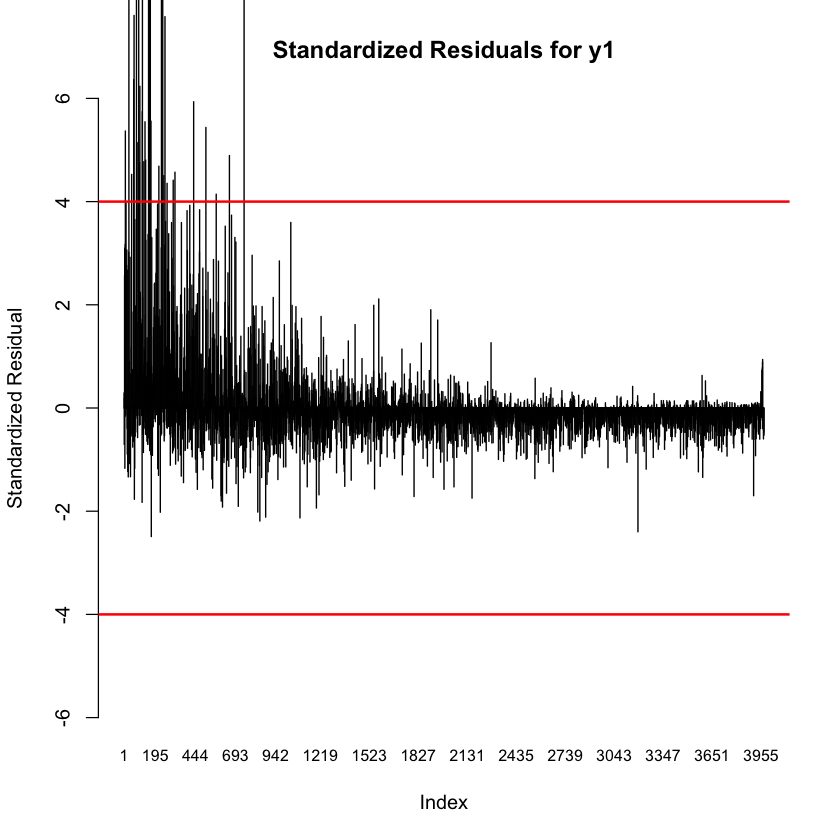

In [55]:
# Standardized Residuals (y1)
range(stdres(best_fit_plot_y1))

barplot(height = stdres(best_fit_plot_y1), names.arg = 1:3973, ylim = c(-6, 6),
        main = "Standardized Residuals for y1", cex.names = 0.8,
        xlab = "Index", y = "Standardized Residual")
abline(h = 4, col = "Red", lwd = 2)
abline(h = -4, col = "Red", lwd = 2)

[1] -2.983277 24.782134

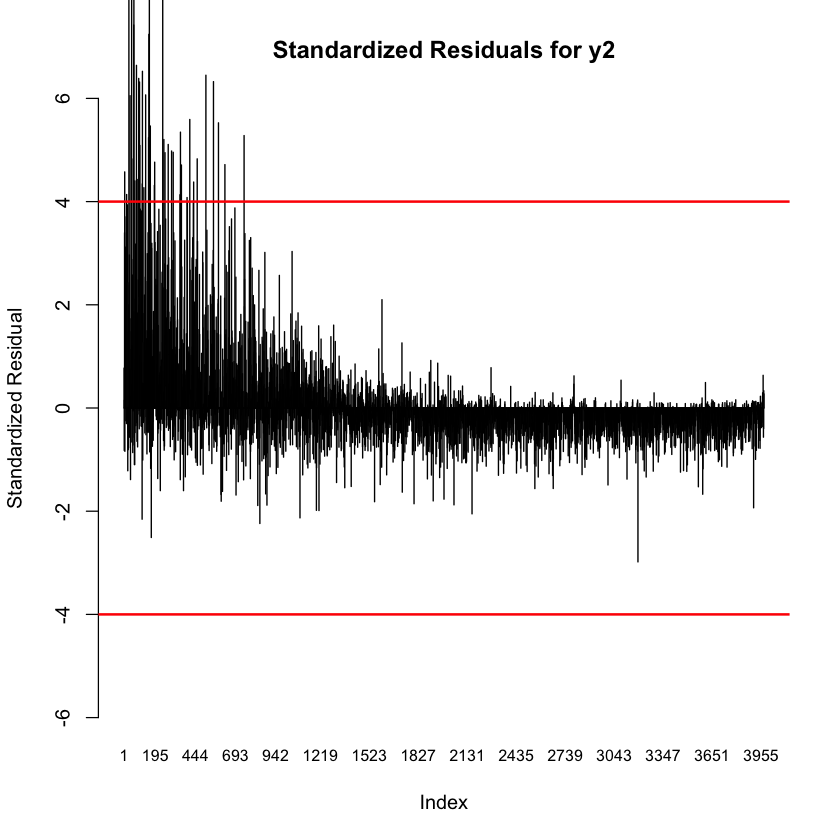

In [56]:
# Standardized Residuals (y2)
range(stdres(best_fit_plot_y2))

barplot(height = stdres(best_fit_plot_y2), names.arg = 1:3973, ylim = c(-6, 6),
        main = "Standardized Residuals for y2", cex.names = 0.8,
        xlab = "Index", y = "Standardized Residual")
abline(h = 4, col = "Red", lwd = 2)
abline(h = -4, col = "Red", lwd = 2)

[1] -2.494162 27.152579

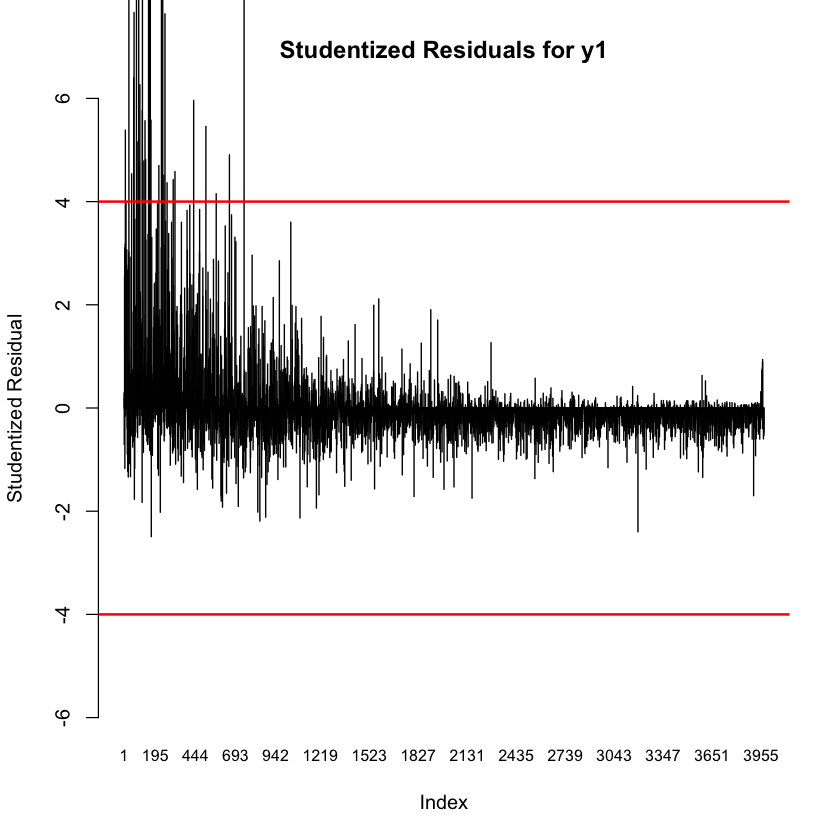

In [57]:
# Studentized Residuals (y1)
range(studres(best_fit_plot_y1))

barplot(height = studres(best_fit_plot_y1), names.arg = 1:3973, ylim = c(-6, 6),
        main = "Studentized Residuals for y1", cex.names = 0.8,
        xlab = "Index", y = "Studentized Residual")
abline(h = 4, col = "Red", lwd = 2)
abline(h = -4, col = "Red", lwd = 2)

[1] -2.986252 26.953072

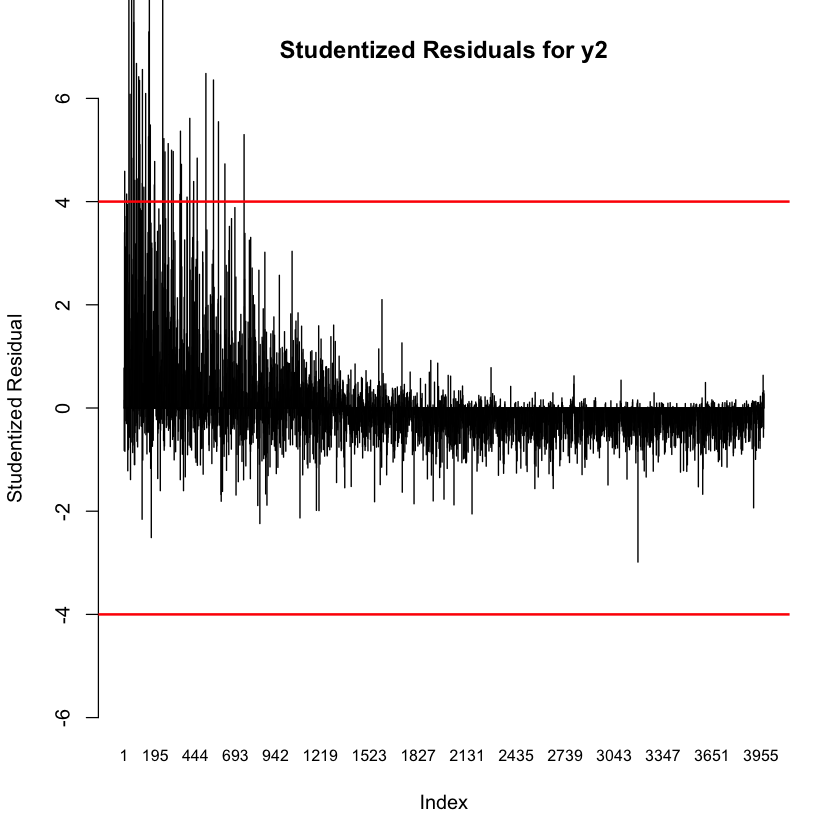

In [58]:
# Studentized Residuals (y2)
range(studres(best_fit_plot_y2))

barplot(height = studres(best_fit_plot_y2), names.arg = 1:3973, ylim = c(-6, 6),
        main = "Studentized Residuals for y2", cex.names = 0.8,
        xlab = "Index", y = "Studentized Residual")
abline(h = 4, col = "Red", lwd = 2)
abline(h = -4, col = "Red", lwd = 2)

[1] -2.494162 27.152579

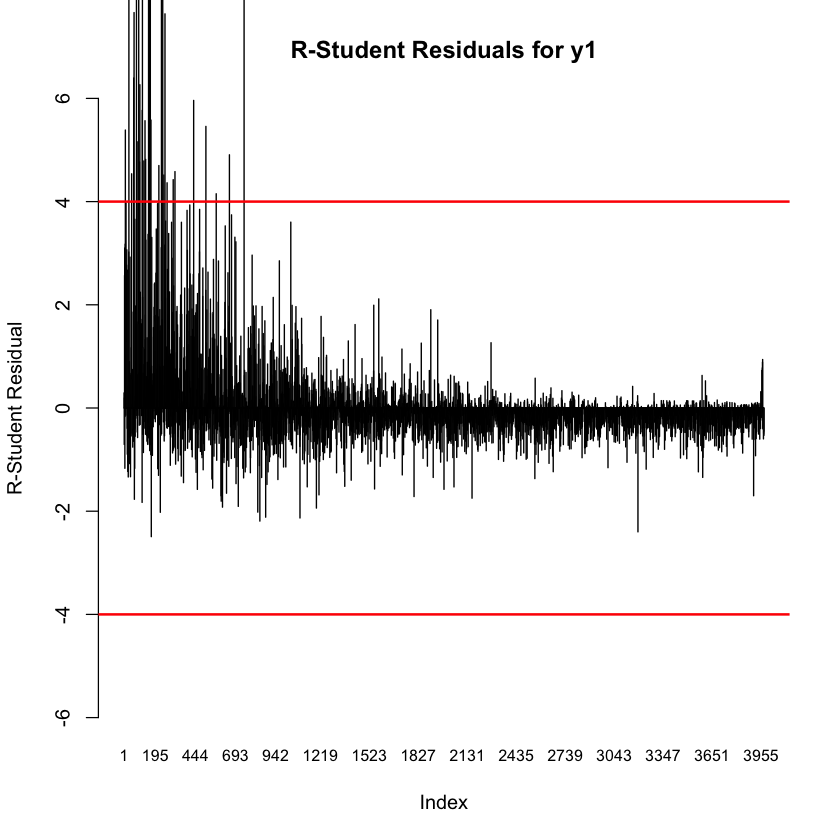

In [59]:
# R-Student Residuals (y1)
range(rstudent(best_fit_plot_y1))

barplot(height = rstudent(best_fit_plot_y1), names.arg = 1:3973, ylim = c(-6, 6),
        main = "R-Student Residuals for y1", cex.names = 0.8,
        xlab = "Index", y = "R-Student Residual")
abline(h = 4, col = "Red", lwd = 2)
abline(h = -4, col = "Red", lwd = 2)

[1] -2.986252 26.953072

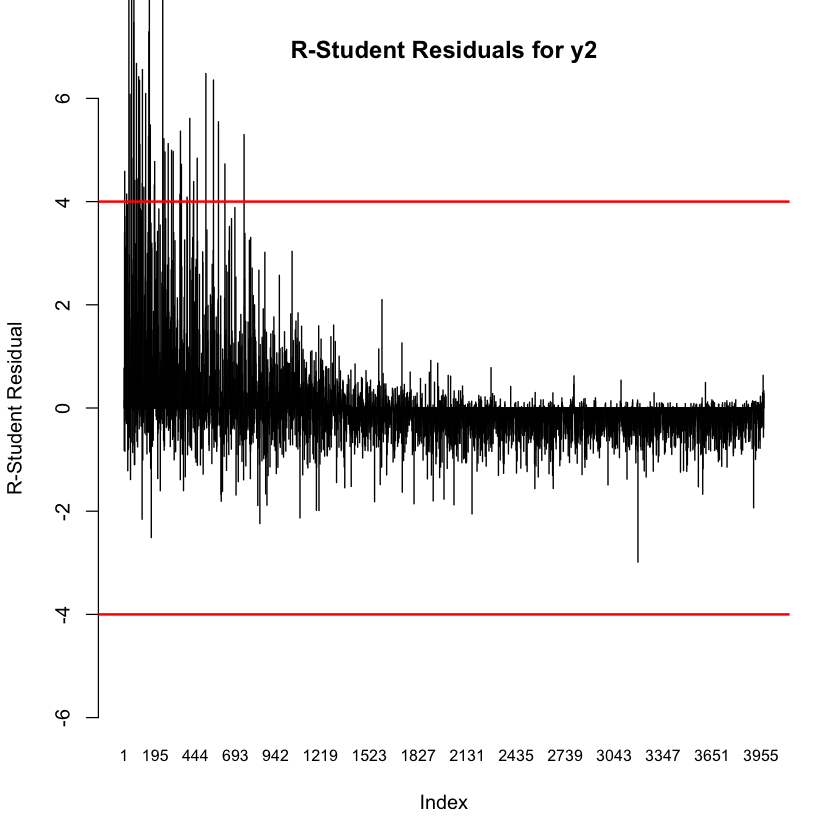

In [60]:
# R-Student Residuals (y2)
range(rstudent(best_fit_plot_y2))

barplot(height = rstudent(best_fit_plot_y2), names.arg = 1:3973, ylim = c(-6, 6),
        main = "R-Student Residuals for y2", cex.names = 0.8,
        xlab = "Index", y = "R-Student Residual")
abline(h = 4, col = "Red", lwd = 2)
abline(h = -4, col = "Red", lwd = 2)

## 6.2. After Removing Outliers

[1] -3.344440  4.061066

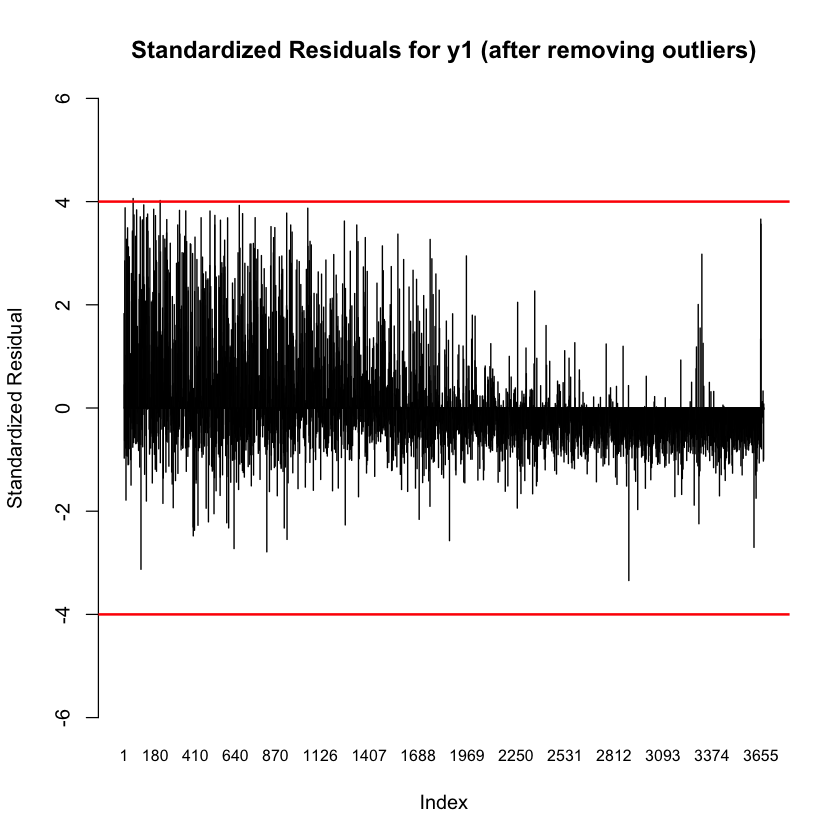

In [61]:
# Standardized Residuals (y1)
range(stdres(final_fit_y1))

barplot(height = stdres(final_fit_y1), names.arg = 1:3672, ylim = c(-6, 6),
        main = "Standardized Residuals for y1 (after removing outliers)", cex.names = 0.8,
        xlab = "Index", y = "Standardized Residual")
abline(h = 4, col = "Red", lwd = 2)
abline(h = -4, col = "Red", lwd = 2)

[1] -2.964639  4.081702

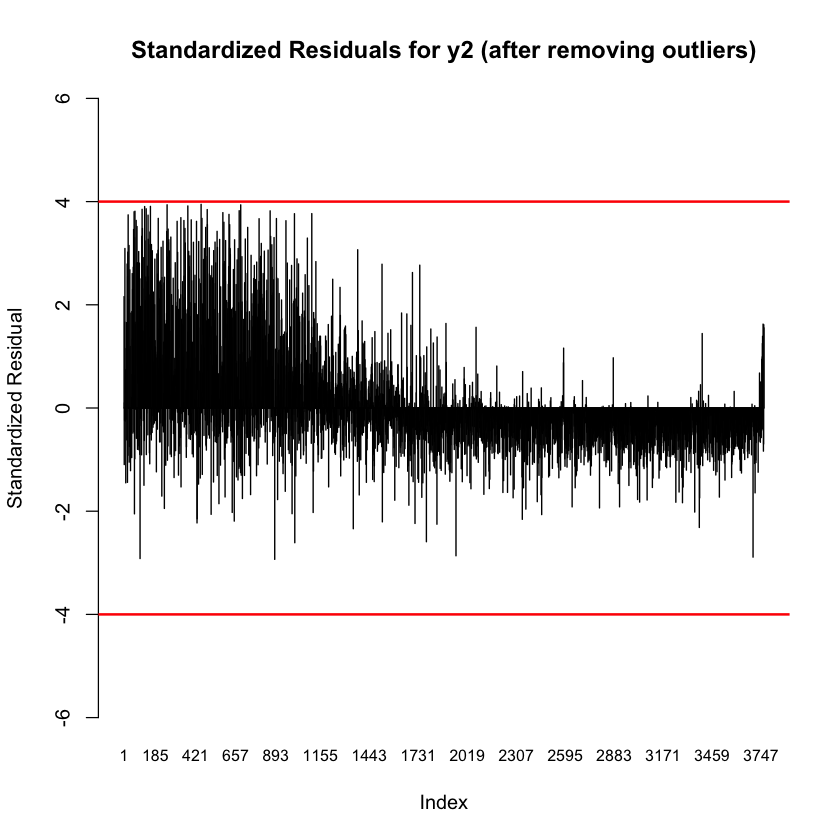

In [62]:
# Standardized Residuals (y2)
range(stdres(final_fit_y2))

barplot(height = stdres(optimal_fit_y2), names.arg = 1:3764, ylim = c(-6, 6),
        main = "Standardized Residuals for y2 (after removing outliers)", cex.names = 0.8,
        xlab = "Index", y = "Standardized Residual")
abline(h = 4, col = "Red", lwd = 2)
abline(h = -4, col = "Red", lwd = 2)

[1] -3.349100  4.069682

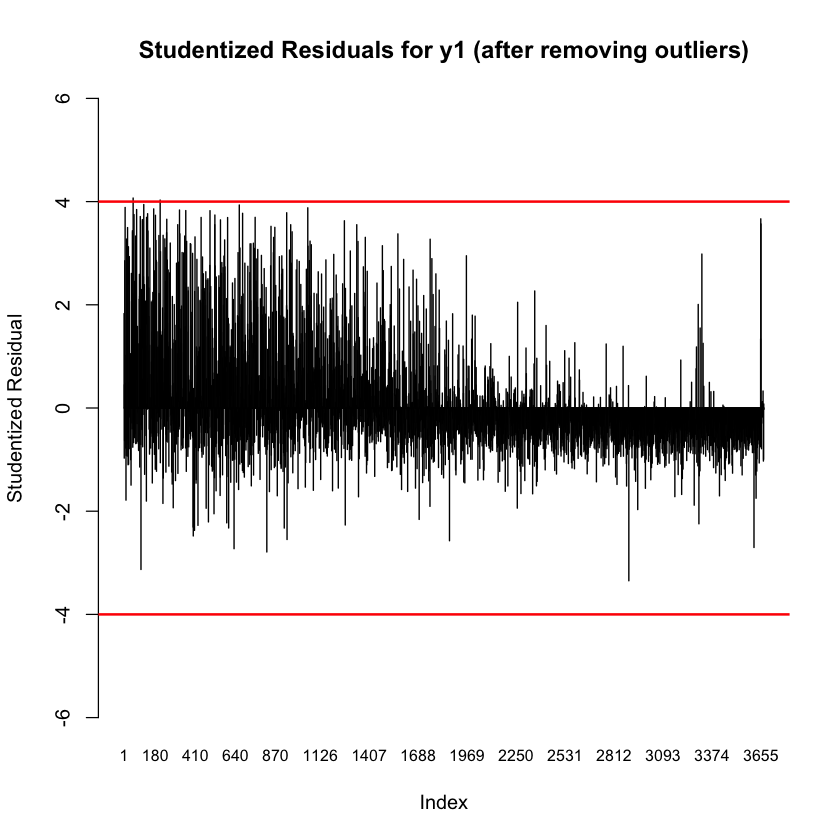

In [63]:
# Studentized Residuals (y1)
range(studres(final_fit_y1))

barplot(height = studres(final_fit_y1), names.arg = 1:3672, ylim = c(-6, 6),
        main = "Studentized Residuals for y1 (after removing outliers)", cex.names = 0.8,
        xlab = "Index", y = "Studentized Residual")
abline(h = 4, col = "Red", lwd = 2)
abline(h = -4, col = "Red", lwd = 2)

[1] -2.967718  4.090237

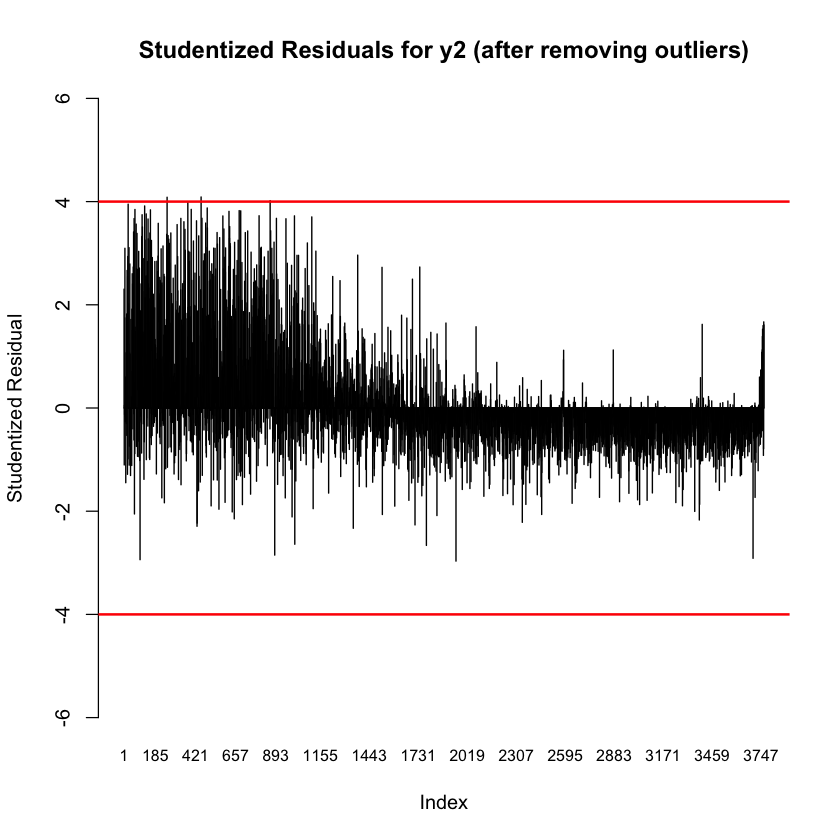

In [64]:
# Studentized Residuals (y2)
range(studres(final_fit_y2))

barplot(height = studres(final_fit_y2), names.arg = 1:3764, ylim = c(-6, 6),
        main = "Studentized Residuals for y2 (after removing outliers)", cex.names = 0.8,
        xlab = "Index", y = "Studentized Residual")
abline(h = 4, col = "Red", lwd = 2)
abline(h = -4, col = "Red", lwd = 2)

[1] -3.349100  4.069682

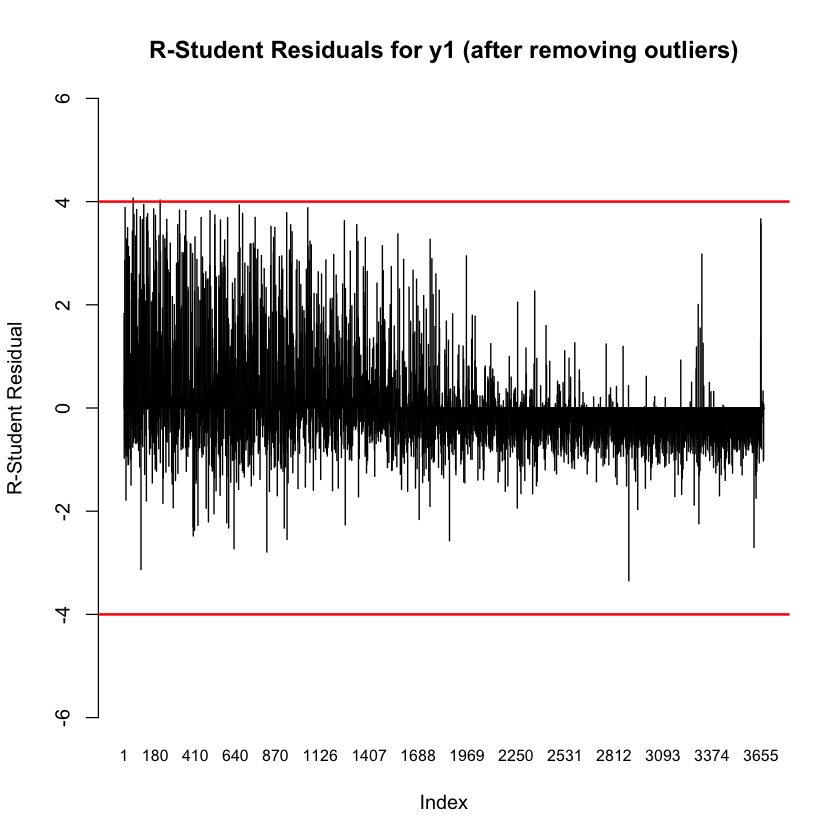

In [65]:
# R-Student Residuals (y1)
range(rstudent(final_fit_y1))

barplot(height = rstudent(final_fit_y1), names.arg = 1:3672, ylim = c(-6, 6),
        main = "R-Student Residuals for y1 (after removing outliers)", cex.names = 0.8,
        xlab = "Index", y = "R-Student Residual")
abline(h = 4, col = "Red", lwd = 2)
abline(h = -4, col = "Red", lwd = 2)


[1] -2.967718  4.090237

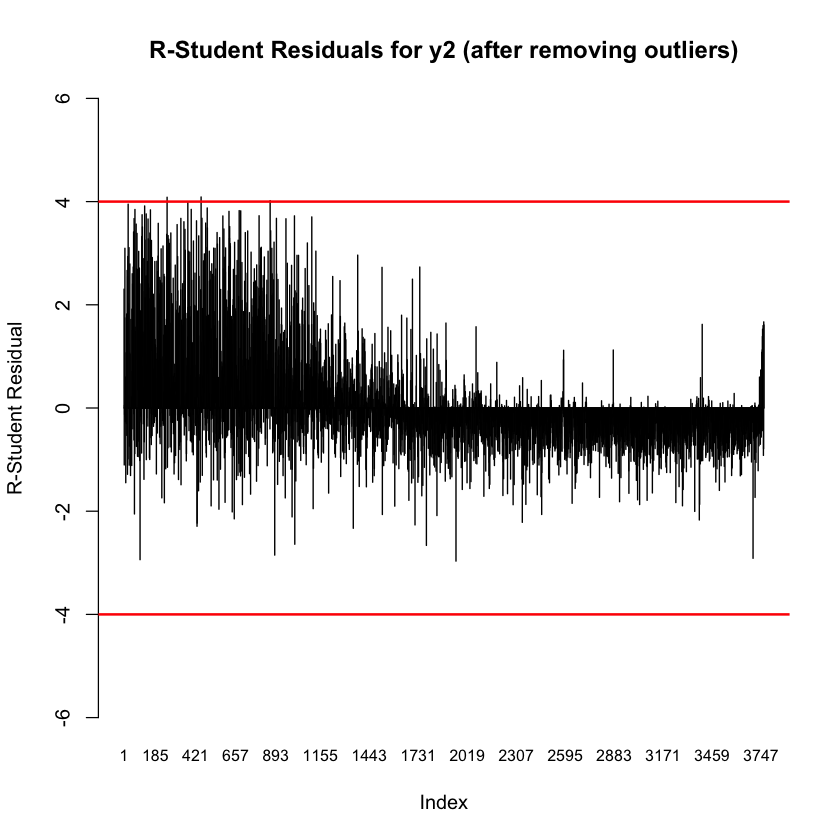

In [66]:
# R-Student Residuals (y2)
range(rstudent(final_fit_y2))

barplot(height = rstudent(final_fit_y2), names.arg = 1:3764, ylim = c(-6, 6),
        main = "R-Student Residuals for y2 (after removing outliers)", cex.names = 0.8,
        xlab = "Index", y = "R-Student Residual")
abline(h = 4, col = "Red", lwd = 2)
abline(h = -4, col = "Red", lwd = 2)

# 7. Influential & Leverage Analysis

Calculating the number of influential points in the dataset using measures of Cook's Distance, DFBETAS, DFFITS, COVRATIO, and hat values.

## 7.1. Influential Analysis

In [67]:
influential_analysis_y1 <- influence.measures(final_fit_y1)
influential_measures_y1 <- data.frame(summary(influential_analysis_y1))

Potentially influential observations of
	 lm(formula = y1 ~ x1 + x2 + x3 + x8 + x13 + x17 + x18, data = remove_observations_y1) :

     dfb.1_ dfb.x1 dfb.x2 dfb.x3 dfb.x8 dfb.x13 dfb.x17 dfb.x18 dffit   cov.r  
2     0.01   0.00   0.01  -0.01  -0.04  -0.06    0.01    0.01   -0.08    1.01_*
7    -0.10   0.05   0.09  -0.08   0.34  -0.11   -0.05   -0.01    0.37_*  1.00  
11    0.00   0.00  -0.02   0.05  -0.01  -0.01   -0.04    0.04    0.10    0.97_*
21   -0.01   0.02  -0.03  -0.01  -0.04   0.02    0.02    0.01   -0.06    1.01_*
27    0.00  -0.02   0.14   0.02   0.00   0.10    0.01    0.02    0.21_*  1.01_*
28   -0.01   0.00   0.06   0.04  -0.01  -0.02   -0.05    0.04    0.11    0.98_*
33   -0.08   0.08   0.16  -0.06  -0.01  -0.04   -0.06    0.06    0.22_*  0.99_*
37    0.01  -0.01   0.06   0.03  -0.02  -0.01    0.10   -0.04    0.15_*  0.98_*
39    0.02  -0.05   0.01   0.01   0.18  -0.05   -0.04    0.01    0.19_*  1.00  
40    0.00  -0.01   0.00   0.00   0.02   0.00    0.00    0.00    0.02

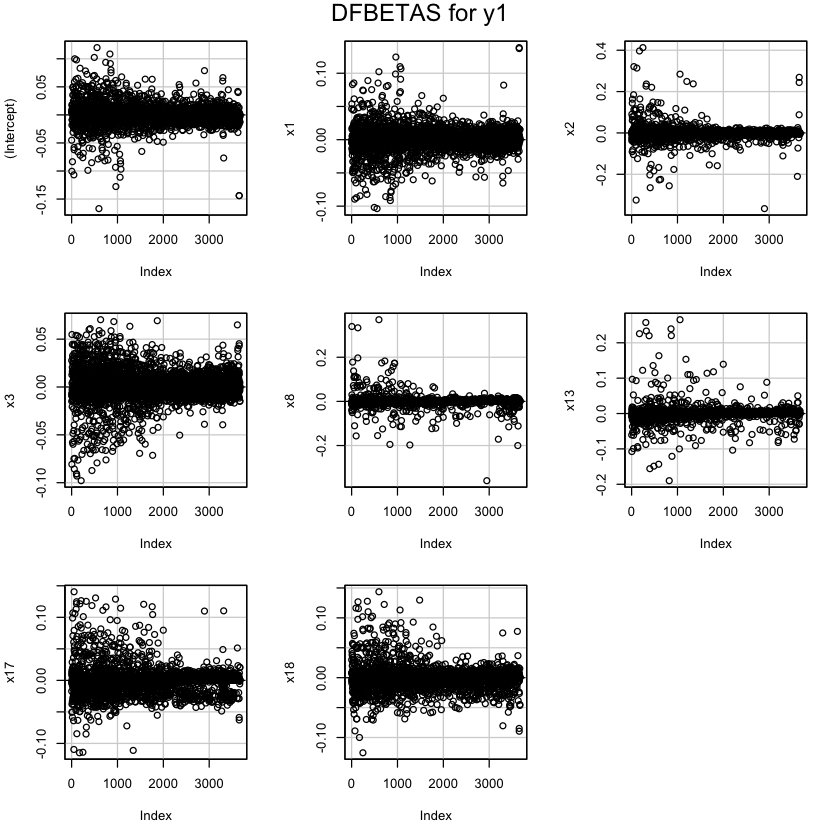

In [68]:
dfbetasPlots(final_fit_y1, intercept = TRUE, main = "DFBETAS for y1")

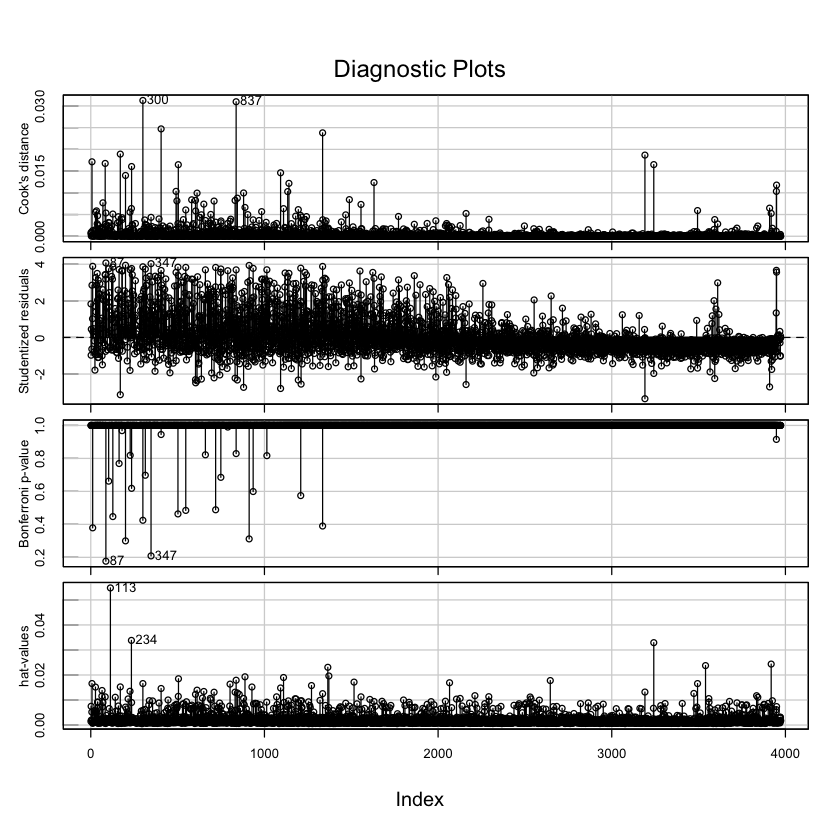

In [69]:
influenceIndexPlot(final_fit_y1)

In [70]:
influential_analysis_y2 <- influence.measures(final_fit_y2)
influential_measures_y2 <- data.frame(summary(influential_analysis_y2))

Potentially influential observations of
	 lm(formula = y2 ~ x1 + x2 + x8 + x9 + x15 + x17, data = remove_observations_y2) :

     dfb.1_ dfb.x1 dfb.x2 dfb.x8 dfb.x9 dfb.x15 dfb.x17 dffit   cov.r   cook.d
1    -0.05   0.05   0.00  -0.01   0.03   0.03   -0.02    0.08    0.99_*  0.00 
6     0.00   0.00  -0.01   0.00   0.00   0.00    0.00   -0.01    1.01_*  0.00 
11    0.01  -0.01  -0.02  -0.01   0.04   0.03   -0.03    0.08    0.98_*  0.00 
21    0.01  -0.02   0.02   0.03   0.00  -0.02   -0.01    0.05    1.01_*  0.00 
26    0.00   0.00   0.01   0.01   0.00   0.00   -0.01    0.02    1.01_*  0.00 
27    0.00  -0.02   0.10   0.01   0.01   0.00    0.01    0.11    1.01_*  0.00 
29    0.00   0.00  -0.02   0.00   0.00   0.00    0.01   -0.02    1.01_*  0.00 
39    0.02  -0.06   0.01   0.22   0.02   0.03   -0.05    0.24_*  1.00    0.01 
40    0.02  -0.04  -0.02   0.12   0.01   0.02   -0.02    0.14_*  1.01_*  0.00 
41    0.04  -0.04  -0.09   0.01  -0.01  -0.01    0.03   -0.10    1.00    0.00 
42    

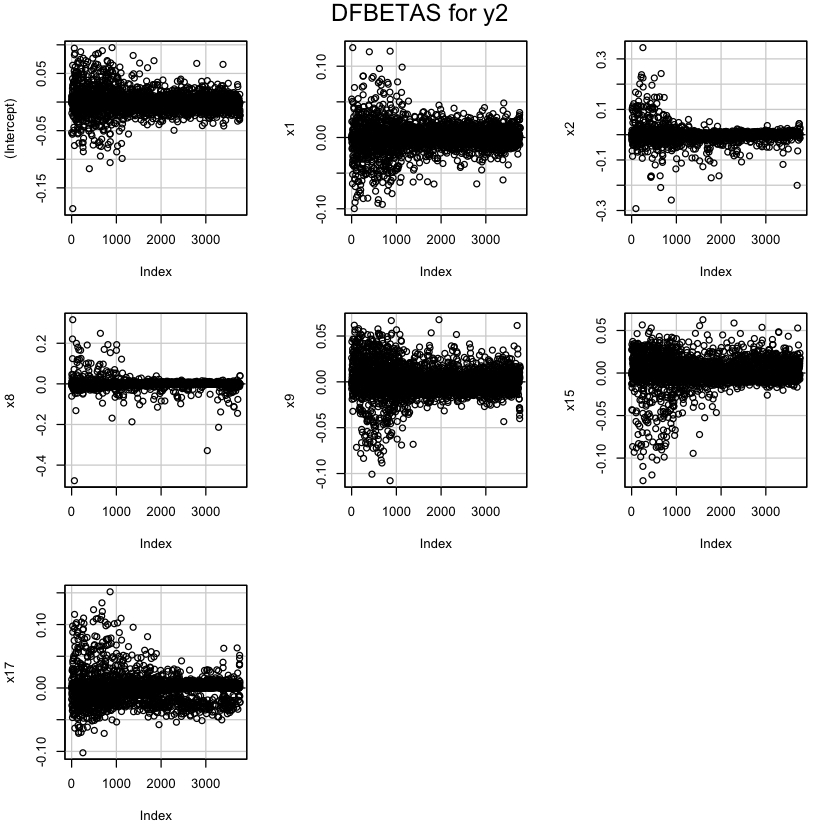

In [71]:
dfbetasPlots(final_fit_y2, intercept = TRUE, main = "DFBETAS for y2")

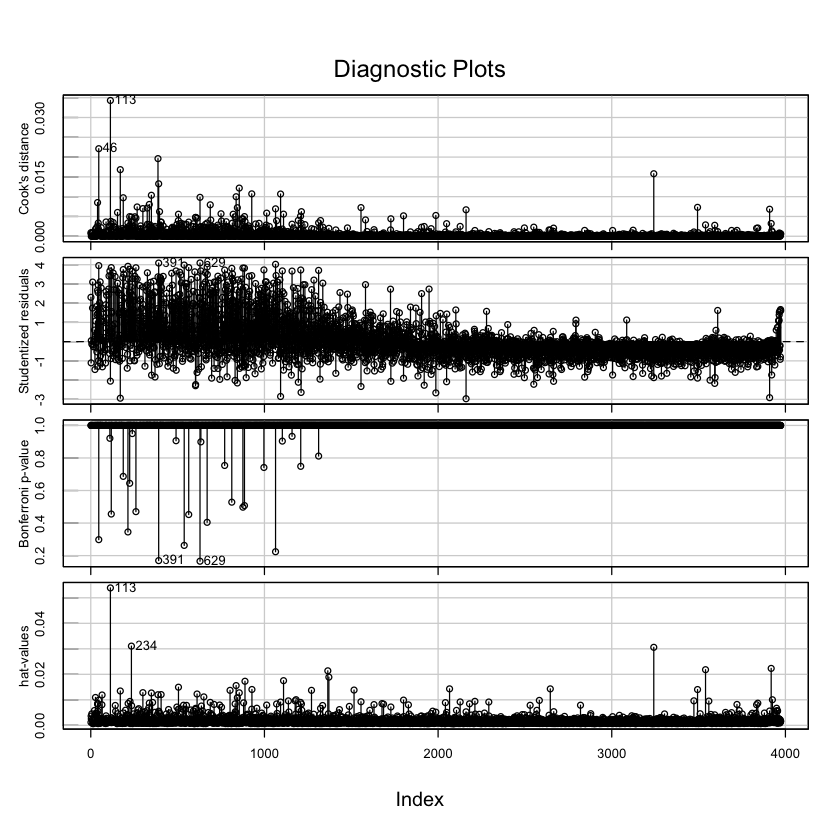

In [72]:
influenceIndexPlot(final_fit_y2)

## 7.2. Leverage Analysis

<ul>
<li>p of y<sub>1</sub>: 7</li>
<li>n of y<sub>1</sub>: 3673</li>
<li>n - p for y<sub>1</sub>: 3672 - 7 = 3665</li>
</ul>

<ul>
<li>p of y<sub>2</sub>: 6</li>
<li>n of y<sub>2</sub>: 3764</li>
<li>n - p: 3764 - 6 = 3758</li>
</ul>

In [73]:
# How many observations have significant COVRATO values in y1? 411
sum(influential_measures_y1$cov.r > (1 + (3 * 7 / 3665)) | influential_measures_y1$cov.r < (1 - (3 * 7 / 3665)))

[1] 411

In [74]:
# How many observations have significant DFBITS values in y1? 127
sum(abs(influential_measures_y1$dffit) > 3 * sqrt(7 / 3665))

[1] 127

In [75]:
# How many observations have significant Cook's D values in y1? 0
sum(influential_measures_y1$cook.d > qf(0.5, 7, 3672))

[1] 0

In [76]:
# How many observations have significant hat values in y1? 259
sum(influential_measures_y1$hat > 3 * 7 / 3672)

[1] 259

In [77]:
# How many observations have significant COVRATO values in y2? 416
sum(influential_measures_y1$cov.r > (1 + (3 * 6 / 3758)) | influential_measures_y1$cov.r < (1 - (3 * 6 / 3758)))

[1] 416

In [78]:
# How many observations have significant DFBITS values in y2? 149
sum(abs(influential_measures_y1$dffit) > 3 * sqrt(6 / 3758))

[1] 149

In [79]:
# How many observations have significant Cook's D values in y2? 0
sum(influential_measures_y1$cook.d > qf(0.5, 6, 3758))

[1] 0

In [80]:
# How many observations have significant hat values in y2? 271
sum(influential_measures_y1$hat > 3 * 6 / 3672)

[1] 271

## 7.3. Normal Probability Plot of Residuals

87 347 
 53 208

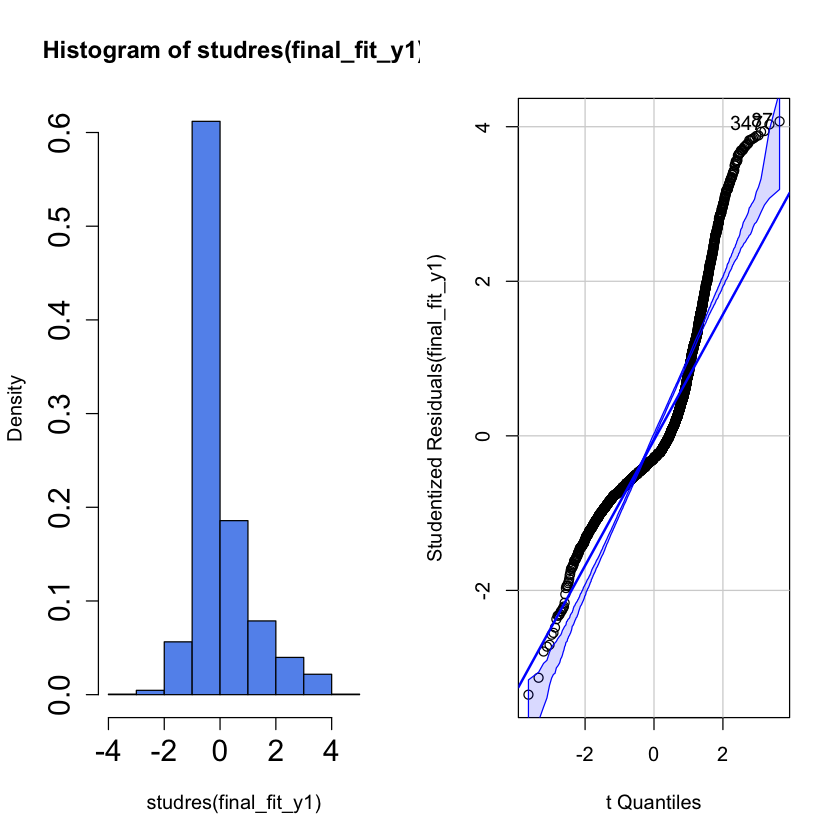

In [81]:
par(mfrow = c(1, 2))
hist(studres(final_fit_y1), breaks = 10, freq = FALSE, col = "cornflowerblue",
     cex.axis = 1.5)
qqPlot(final_fit_y1)

391 629 
254 454

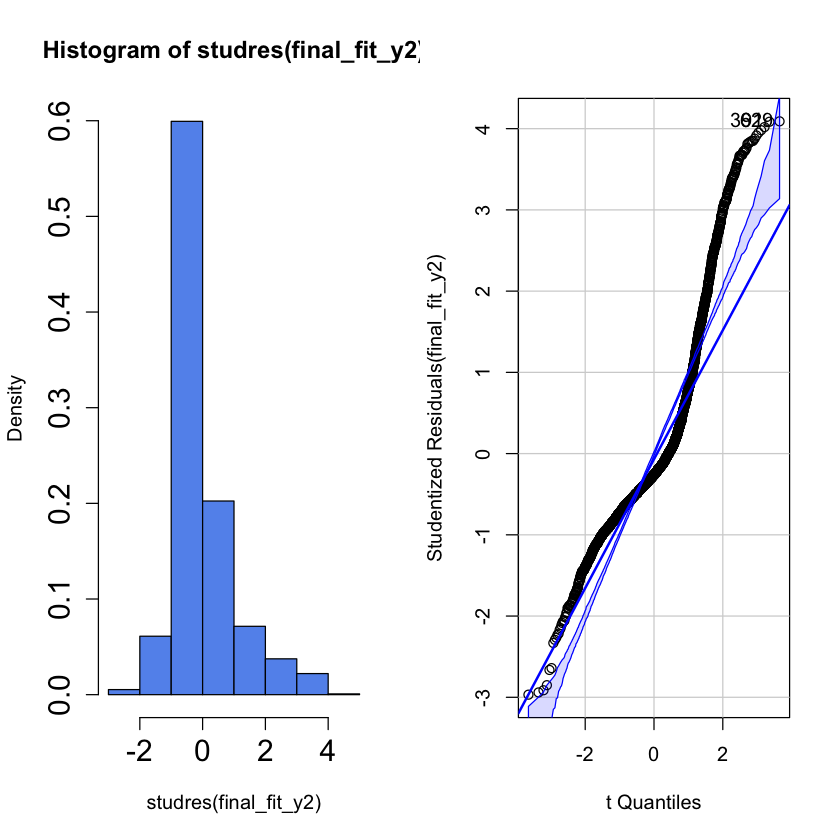

In [82]:
par(mfrow = c(1, 2))
hist(studres(final_fit_y2), breaks = 10, freq = FALSE, col = "cornflowerblue",
     cex.axis = 1.5)
qqPlot(final_fit_y2)

## 7.4. Plots of Residuals vs Fitted Values

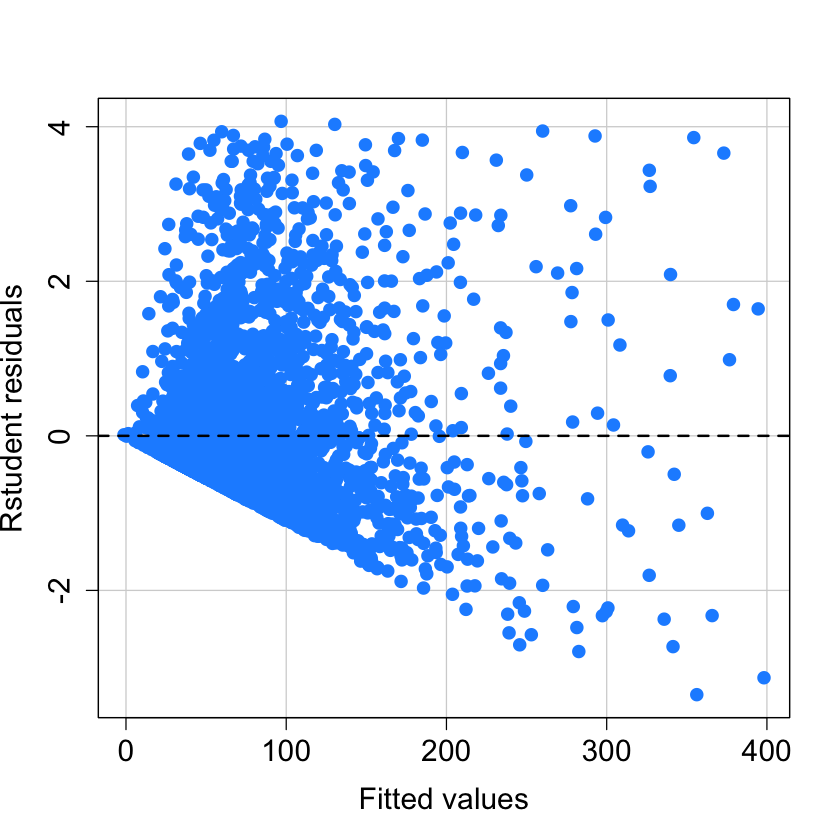

In [83]:
par(mfrow = c(1, 1))
residualPlot(final_fit_y1, type = "rstudent", quadratic = FALSE, col = "dodgerblue",
             pch = 16, cex = 1.5, cex.axis = 1.5, cex.lab = 1.5)

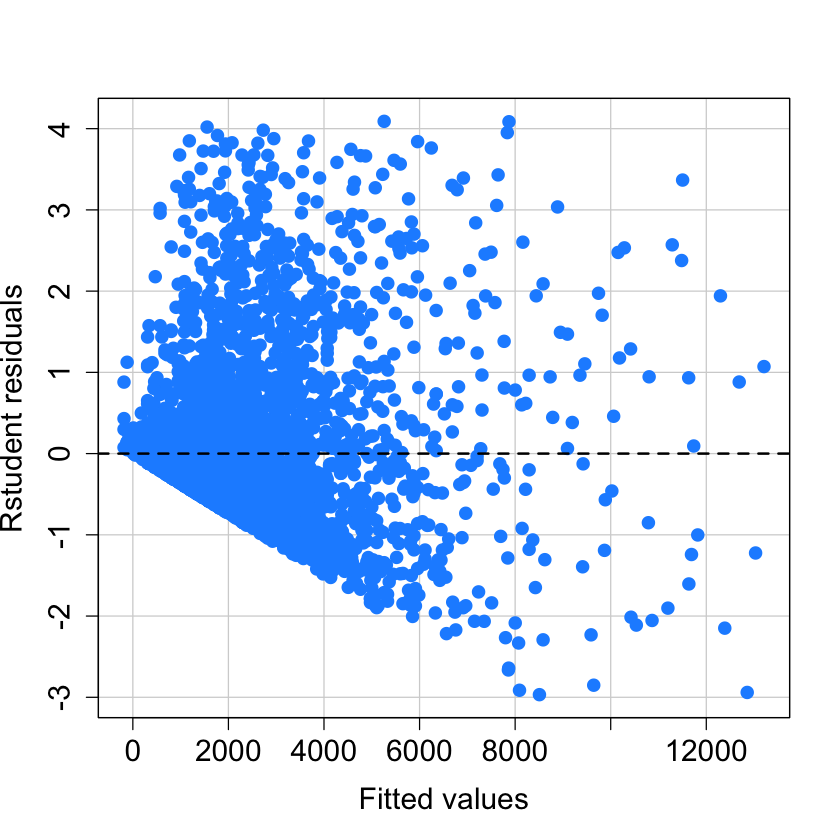

In [84]:
par(mfrow = c(1, 1))
residualPlot(final_fit_y2, type = "rstudent", quadratic = FALSE, col = "dodgerblue",
             pch = 16, cex = 1.5, cex.axis = 1.5, cex.lab = 1.5)

Using a histogram and a normal probability plot (qq plot) of the studentized residuals to determine whether or not the error terms are normally distributed, the residuals in the histogram form a bell curve but the residuals in the normal probability plot are not linear. Additionally, I plotted the r-student residuals against the fitted values to determine whether or nor the errors terms have constant variance. The plot of the r-student residuals against the fitted values do not form a horizontal band around the zero line. As a result, the normality and constant variance assumptions seem to be violated, so I attempted to transform the data.

#  8. Transformations

## 8.1. Box-Cox Transformation
The optimal lambda (hyperparameter) for y<sub>1</sub> and y<sub>2</sub> were tuned to be:
<ul>
<li>lambda for y1: 1&frasl;7</li>
<li>lambda for y2: 2&frasl;9</li>
</ul>

In [85]:
lambda_y1 <- 1/7
boxcox_transform_y1 <- lm((y1^lambda_y1 - 1)/lambda_y1 ~ x1 + x2 + x3 + x8 + x13 + x17 + x18, data = remove_observations_y1)
summary(boxcox_transform_y1)


Call:
lm(formula = (y1^lambda_y1 - 1)/lambda_y1 ~ x1 + x2 + x3 + x8 + 
    x13 + x17 + x18, data = remove_observations_y1)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6067  -1.3504   0.4146   2.1504   6.3007 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.318556   0.656833   6.575 5.56e-11 ***
x1          -0.104189   0.028570  -3.647 0.000269 ***
x2           0.291167   0.014709  19.796  < 2e-16 ***
x3           0.221434   0.115145   1.923 0.054547 .  
x8           0.361614   0.101674   3.557 0.000380 ***
x13         -0.674964   0.264824  -2.549 0.010852 *  
x17          0.670545   0.143248   4.681 2.96e-06 ***
x18          0.014376   0.002249   6.393 1.83e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.357 on 3664 degrees of freedom
Multiple R-squared:  0.164,	Adjusted R-squared:  0.1624 
F-statistic: 102.7 on 7 and 3664 DF,  p-value: < 2.2e-16


3566 3909 
3272 3615

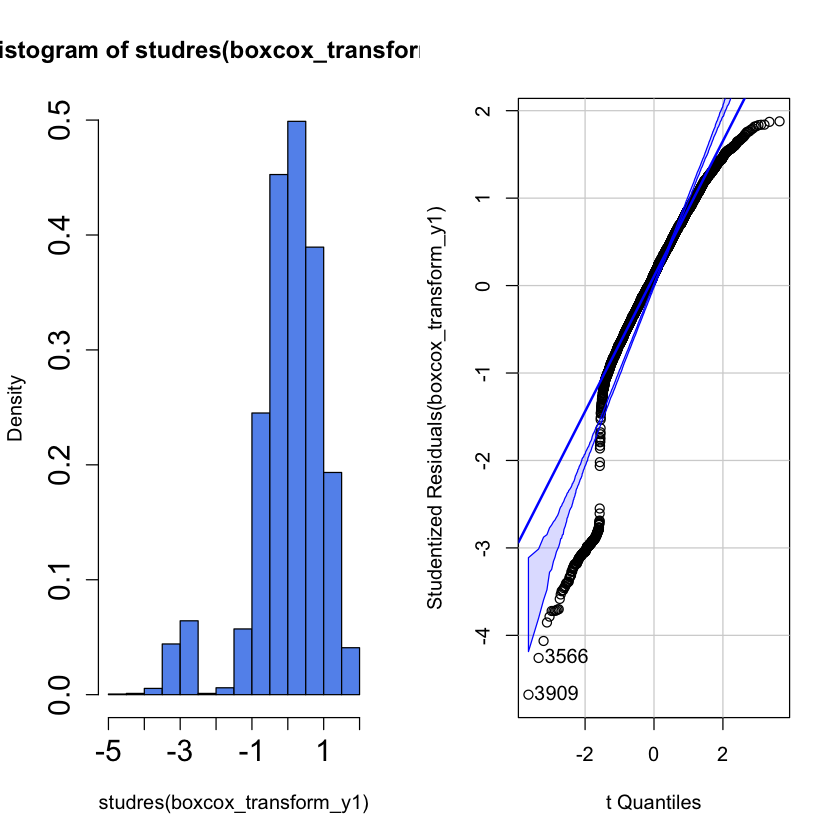

In [86]:
par(mfrow = c(1, 2))
hist(studres(boxcox_transform_y1), breaks = 10, freq = FALSE, col = "cornflowerblue",
     cex.axis = 1.5)
qqPlot(boxcox_transform_y1)


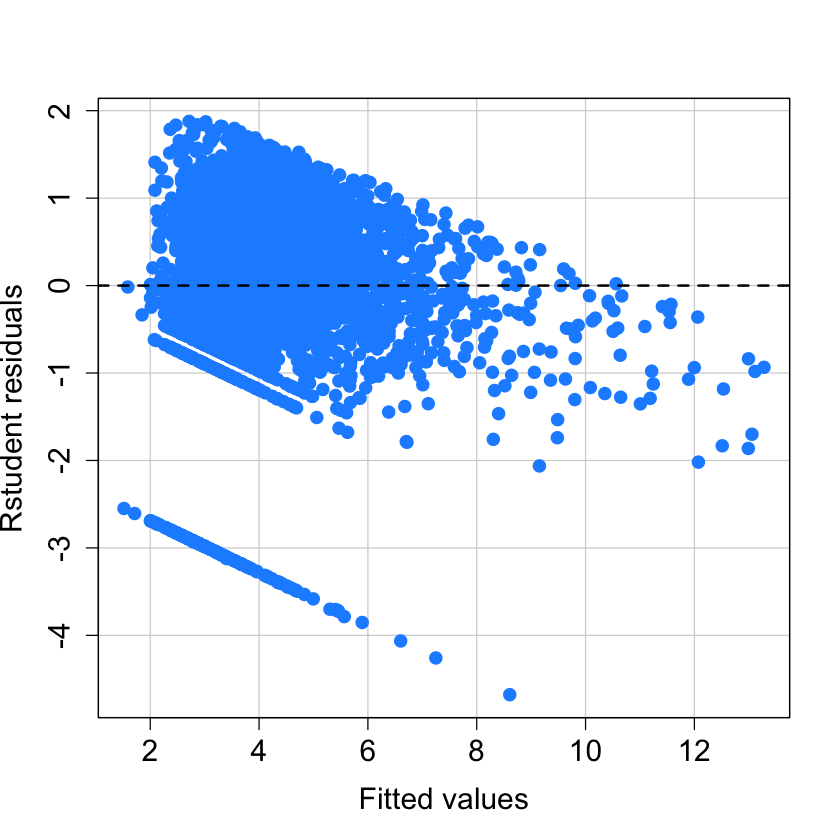

In [87]:
par(mfrow = c(1, 1))
residualPlot(boxcox_transform_y1, type = "rstudent", quadratic = FALSE, col = "dodgerblue",
             pch = 16, cex = 1.5, cex.axis = 1.5, cex.lab = 1.5)

In [88]:
lambda_y2 <- 2/9
boxcox_transform_y2 <- lm((y2^lambda_y2 - 1)/lambda_y2 ~ x1 + x2 + x8 + x9 + x15 + x17, data = remove_observations_y2)
summary(boxcox_transform_y2)


Call:
lm(formula = (y2^lambda_y2 - 1)/lambda_y2 ~ x1 + x2 + x8 + x9 + 
    x15 + x17, data = remove_observations_y2)

Residuals:
     Min       1Q   Median       3Q      Max 
-27.1418  -4.2336  -0.1579   4.3844  17.8036 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 19.89955    1.26983  15.671  < 2e-16 ***
x1          -0.40248    0.05520  -7.291 3.72e-13 ***
x2           0.78395    0.02676  29.291  < 2e-16 ***
x8           0.95220    0.19291   4.936 8.33e-07 ***
x9           0.94566    0.22605   4.183 2.94e-05 ***
x15          0.80029    0.24459   3.272  0.00108 ** 
x17          2.18742    0.27200   8.042 1.17e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.551 on 3757 degrees of freedom
Multiple R-squared:  0.2628,	Adjusted R-squared:  0.2616 
F-statistic: 223.2 on 6 and 3757 DF,  p-value: < 2.2e-16


1110 3494 
 904 3285

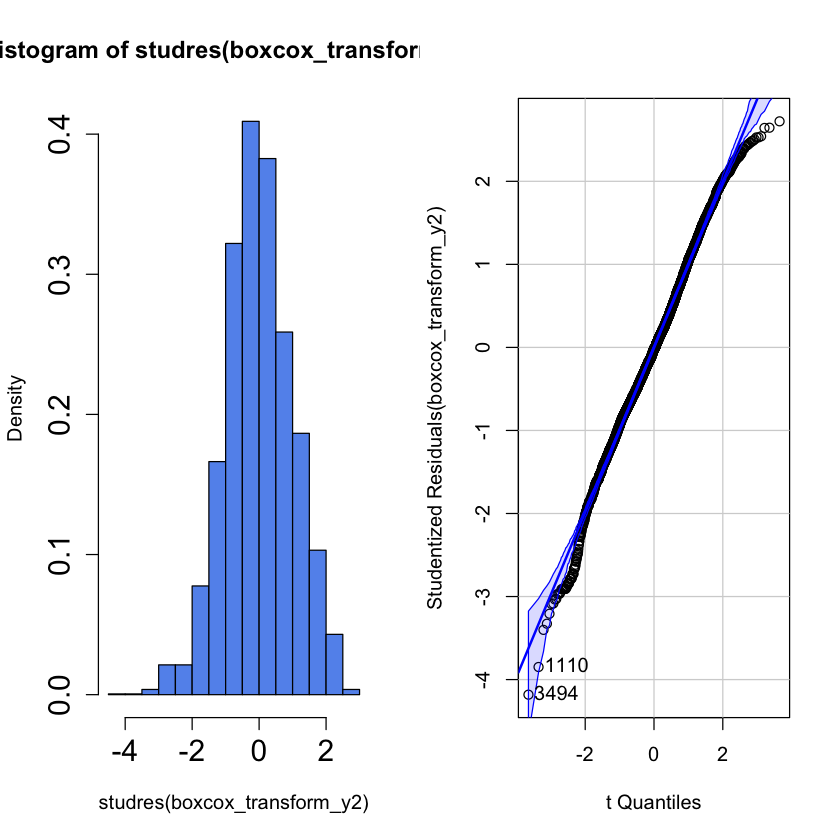

In [89]:
par(mfrow = c(1, 2))
hist(studres(boxcox_transform_y2), breaks = 10, freq = FALSE, col = "cornflowerblue",
     cex.axis = 1.5)
qqPlot(boxcox_transform_y2)

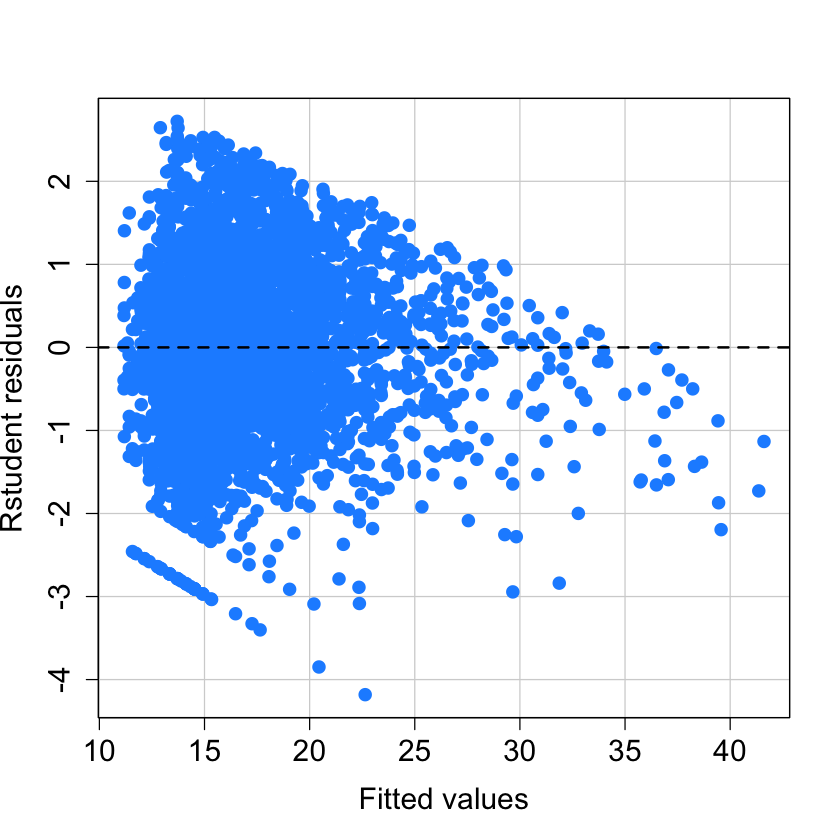

In [90]:
par(mfrow = c(1, 1))
residualPlot(boxcox_transform_y2, type = "rstudent", quadratic = FALSE, col = "dodgerblue",
             pch = 16, cex = 1.5, cex.axis = 1.5, cex.lab = 1.5)

## 8.2. Yeo-Johnson Transformation

In [91]:
yeojohnson_transform_y1 <- lm(((((y1 + 1)^lambda_y1) - 1)/lambda_y1) ~ x1 + x2 + x3 + x8 + x13 + x17 + x18, data = remove_observations_y1)
summary(yeojohnson_transform_y1)


Call:
lm(formula = ((((y1 + 1)^lambda_y1) - 1)/lambda_y1) ~ x1 + x2 + 
    x3 + x8 + x13 + x17 + x18, data = remove_observations_y1)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3513 -1.6640 -0.0103  1.6768  5.5038 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.835961   0.445995  10.843  < 2e-16 ***
x1          -0.086101   0.019399  -4.438 9.33e-06 ***
x2           0.237044   0.009987  23.735  < 2e-16 ***
x3           0.185327   0.078185   2.370   0.0178 *  
x8           0.345507   0.069038   5.005 5.86e-07 ***
x13         -0.512462   0.179817  -2.850   0.0044 ** 
x17          0.456352   0.097266   4.692 2.81e-06 ***
x18          0.009258   0.001527   6.064 1.47e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.28 on 3664 degrees of freedom
Multiple R-squared:  0.2096,	Adjusted R-squared:  0.208 
F-statistic: 138.8 on 7 and 3664 DF,  p-value: < 2.2e-16


3566 3909 
3272 3615

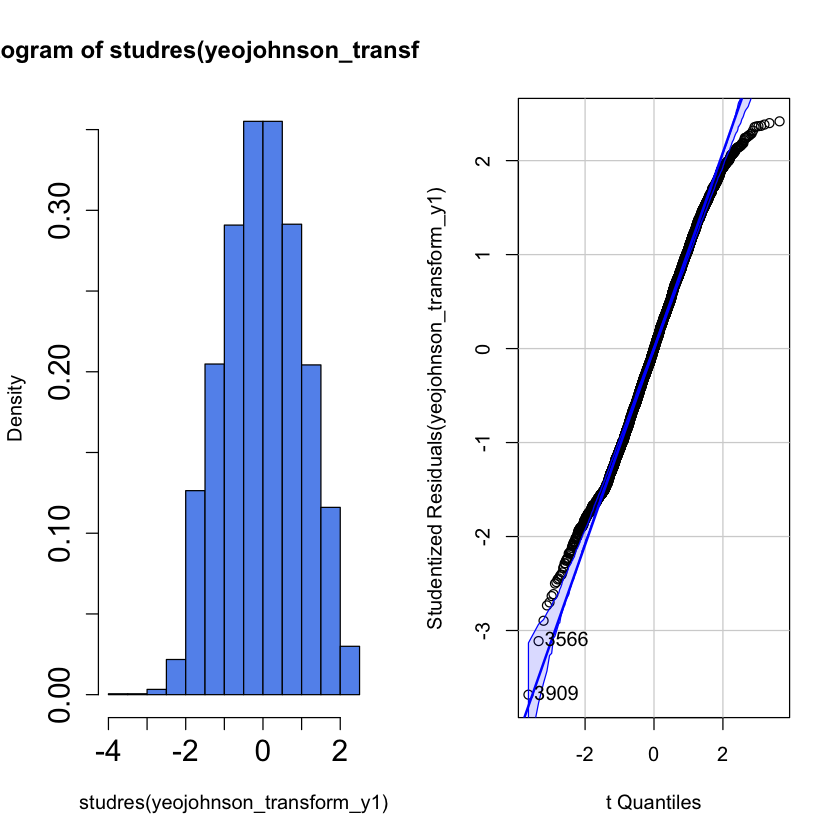

In [92]:
par(mfrow= c(1, 2))
hist(studres(yeojohnson_transform_y1), breaks = 10, freq = FALSE, col = "cornflowerblue",
     cex.axis = 1.5)
qqPlot(yeojohnson_transform_y1)

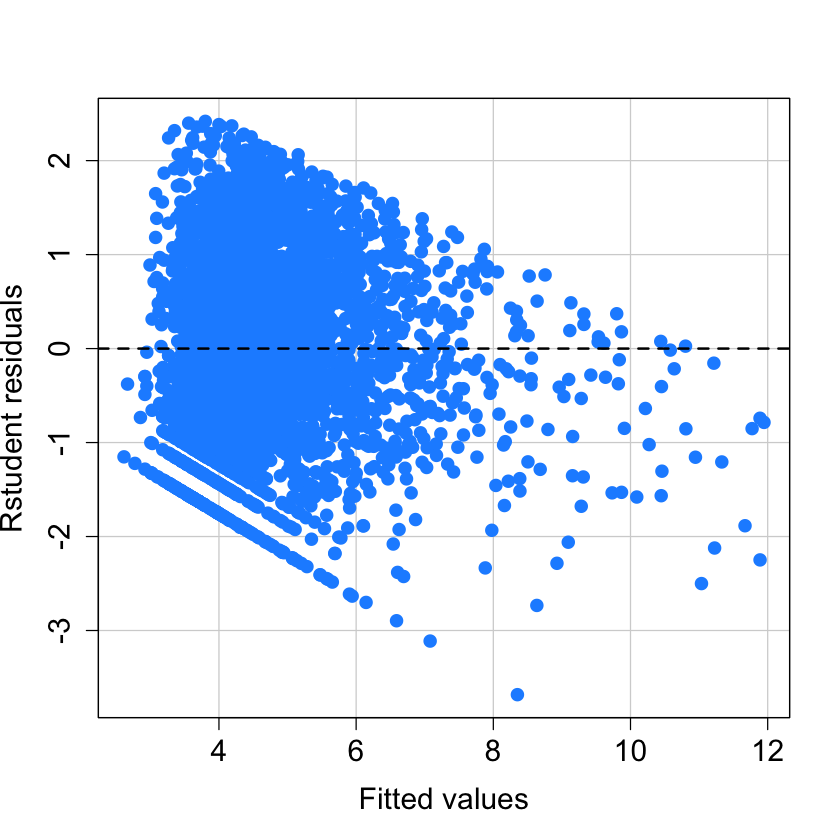

In [93]:
par(mfrow = c(1, 1))
residualPlot(yeojohnson_transform_y1, type = "rstudent", quadratic = FALSE, col = "dodgerblue",
             pch = 16, cex = 1.5, cex.axis = 1.5, cex.lab = 1.5)

In [94]:
yeojohnson_transform_y2 <- lm(((((y2 + 1)^lambda_y2) - 1)/lambda_y2) ~ x1 + x2 + x3 + x8 + x13 + x17 + x18, data = remove_observations_y2)
summary(yeojohnson_transform_y2)


Call:
lm(formula = ((((y2 + 1)^lambda_y2) - 1)/lambda_y2) ~ x1 + x2 + 
    x3 + x8 + x13 + x17 + x18, data = remove_observations_y2)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.3129  -4.3061  -0.2318   4.1668  18.1369 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 19.391849   1.228266  15.788  < 2e-16 ***
x1          -0.363269   0.053429  -6.799 1.22e-11 ***
x2           0.752480   0.026787  28.091  < 2e-16 ***
x3           0.707583   0.215991   3.276  0.00106 ** 
x8           1.157465   0.192463   6.014 1.98e-09 ***
x13         -1.504948   0.490211  -3.070  0.00216 ** 
x17          1.993943   0.266847   7.472 9.75e-14 ***
x18          0.025816   0.004219   6.118 1.04e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.382 on 3756 degrees of freedom
Multiple R-squared:  0.272,	Adjusted R-squared:  0.2706 
F-statistic: 200.5 on 7 and 3756 DF,  p-value: < 2.2e-16


1110 3494 
 904 3285

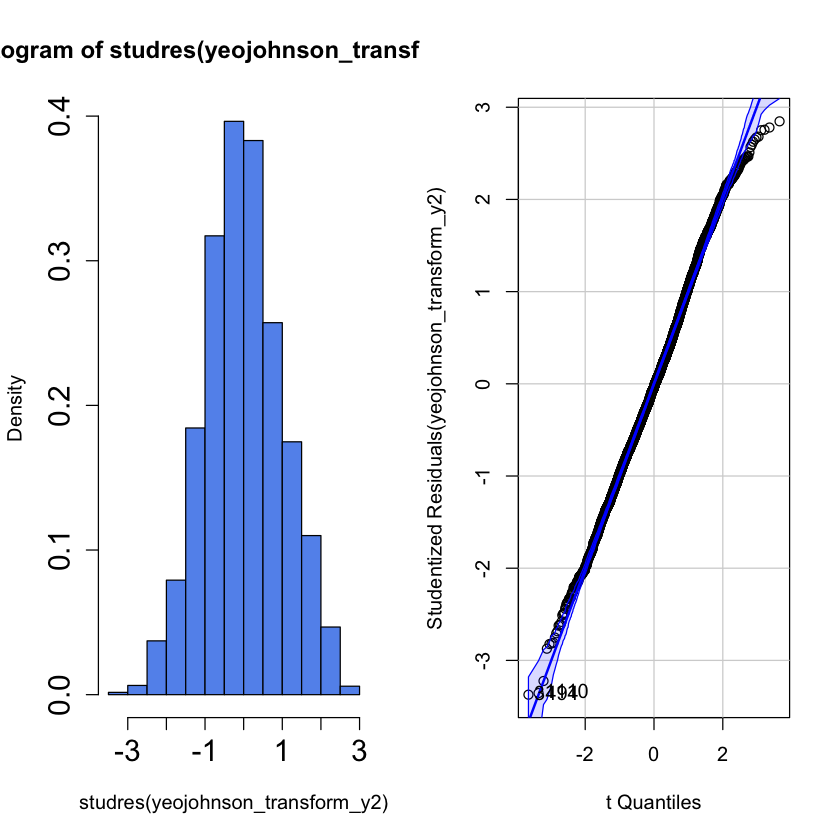

In [95]:
par(mfrow= c(1, 2))
hist(studres(yeojohnson_transform_y2), breaks = 10, freq = FALSE, col = "cornflowerblue",
     cex.axis = 1.5)
qqPlot(yeojohnson_transform_y2)


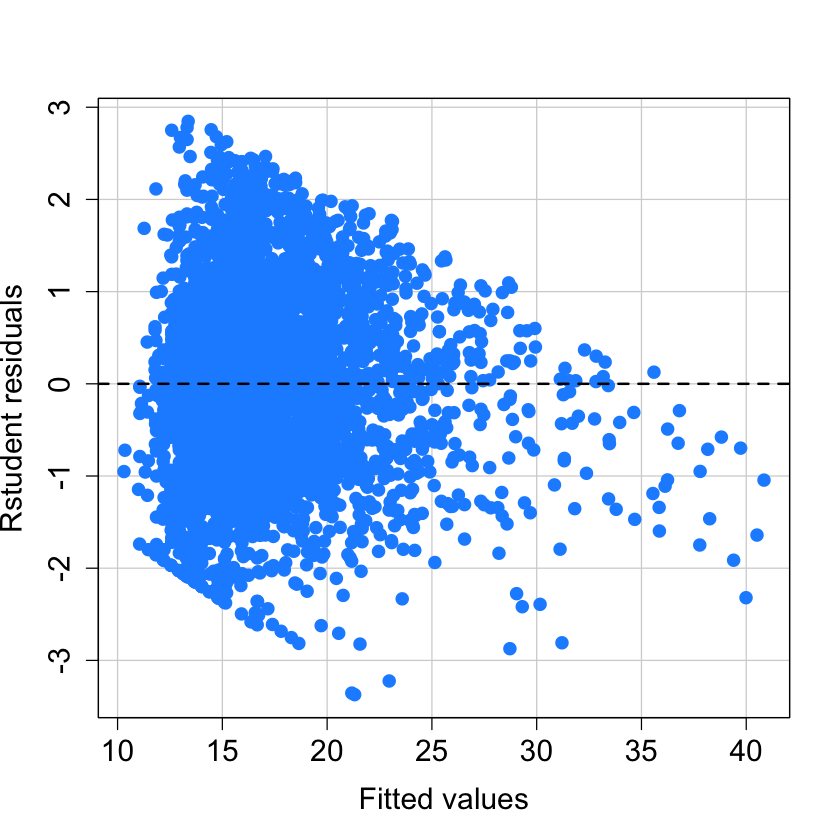

In [96]:
par(mfrow = c(1, 1))
residualPlot(yeojohnson_transform_y2, type = "rstudent", quadratic = FALSE, col = "dodgerblue",
             pch = 16, cex = 1.5, cex.axis = 1.5, cex.lab = 1.5)

After Box-Cox and Yeo-Johnson transformations were performed on the response variables, the histogram of the studentized residuals are bell-shaped and the normal probability plot of the studentized residuals are linear. The plot of the r-student residuals against the fitted values still do not form a horizontal band around the zero line. In both models, applying the transformations decreased the value of adjusted r<sup>2</sup>, and with an already low value, I decided not to proceed with these transformations in an effort to keep the regressions as significant as possible.

# 9. Overall Conclusions

<ul>
<li>Speaking German is ideal, but multilinguality in general is good (except German)</li>
<li>Having a large number of pictures is significant for both metrics of profile popularity</li>
<li>Being verified is significant for both metrics of profile popularity, however this may not be causation, hard to say without more information on who gets "verified"</li>
<li>Younger people are more likely to find success</li>
<li>Very low adjusted r<sup>2</sup> means results will vary</li>
<ul>